In [23]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
import itertools
from ipywidgets import interact, FloatSlider, IntSlider,RadioButtons,Dropdown
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']

In [2]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/Users/james/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy

/Users/james/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



# 已获得所有可能order的RNA的ratio

In [3]:
allratiodata = np.loadtxt('allratiodata.txt')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
rnanames = np.array(['miRNA', 'Y_RNA', 'piRNA', 'srpRNA', 'snoRNA', 'snRNA', 'tRNA',
       'vaultRNA', 'tucpRNA', 'lncRNA', 'mRNA', 'rRNA', 'other_nonhuman',
       'hg38_other','virus','fungi','bacteria'])

In [4]:
rnanames[-6:]

array(['rRNA', 'other_nonhuman', 'hg38_other', 'virus', 'fungi',
       'bacteria'], dtype='|S14')

In [5]:
allratiodata.shape

(864, 17)

In [6]:
allratiodata[0][:-6]

array([3.88954514e-01, 3.35728078e-01, 1.18883459e-02, 2.35362965e-04,
       1.78414084e-02, 6.89019151e-04, 4.44963916e-03, 1.16074266e-04,
       8.64451793e-03, 5.22913018e-02, 2.35130196e-03])

In [7]:
otherrna = np.sum(allratiodata[0][-5:])

In [8]:
mainpie = ['miRNA','other_RNA','Y_RNA', 'piRNA', 'srpRNA', 'snoRNA', 'snRNA', 'tRNA',
       'vaultRNA', 'tucpRNA', 'lncRNA', 'mRNA', 'rRNA']
len(mainpie)

13

In [9]:
allratiodata[0][-5:]

array([0.04518124, 0.01237687, 0.00165836, 0.08486734, 0.00613278])

In [10]:
colors= np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14),(255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189),(197, 176, 213), (140, 86, 75), (196, 156, 148)])/256.

In [11]:
rnanames = np.array(['miRNA', 
            'Y_RNA', 'piRNA', 'srpRNA', 
            'snoRNA', 'snRNA', 'tRNA','vaultRNA',
            'tucpRNA', 'lncRNA','mRNA' ])

In [12]:
pd.read_table('table/per/64_order_summary.per').columns

Index([u'Sample', u'cleanN', u'rRNA_N', u'miRNA', u'piRNA', u'Y_RNA', u'snRNA',
       u'snoRNA', u'srpRNA', u'tRNA', u'lncRNA', u'mRNA', u'hg38other',
       u'nonHuman_N'],
      dtype='object')

In [13]:
np.average(np.array(pd.read_table('table/per/64_order_summary.per').iloc[:,2:])
                                            ,axis=0)/100.

array([2.62045318e-02, 2.95269230e-01, 2.16347700e-02, 3.34916228e-01,
       1.03104546e-03, 1.84534552e-02, 1.61519269e-04, 1.17741796e-03,
       8.08626154e-02, 7.58914739e-03, 6.79853770e-02, 1.44714662e-01])

In [26]:
colorsuse_4 = np.array([(174, 199, 232),  (255, 187, 120),  (255, 127, 14),#miRNA', u'piRNA', u'Y_RNA
             (214, 39, 40),(152, 223, 138),(44, 160, 44),   (255, 152, 150),  #u'snRNA', u'snoRNA', u'srpRNA', u'tRNA',
             (148, 103, 189), (197, 176, 213),
                 (140, 86, 75), (196, 156, 148) ]    )/256.
colorsuse_64 = np.array([(174, 199, 232),  (255, 187, 120),  (255, 127, 14),#miRNA', u'piRNA', u'Y_RNA
             (214, 39, 40),(152, 223, 138),(44, 160, 44),   (255, 152, 150),  #u'snRNA', u'snoRNA', u'srpRNA', u'tRNA',
             (148, 103, 189), (197, 176, 213),
                 (140, 86, 75), (196, 156, 148) ]    )/256.

In [ ]:
colorsuse = np.array([(174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213)])/256
#u'miRNA', u'Y_RNA', u'piRNA', u'srpRNA' u'snoRNA',u'snRNA', , u'tRNA', u'lncRNA', u'mRNA',

In [41]:
rnanames_4  = pd.read_excel('piechart_data.xlsx','4_order').columns[1:]
rnanames_64  = pd.read_excel('piechart_data.xlsx','64-order').columns[1:]

In [56]:
ratiodata_4 = np.array(pd.read_excel('piechart_data.xlsx','4_order'))[0,1:]/100.
ratiodata_64 = np.array(pd.read_excel('piechart_data.xlsx','64-order'))[0,1:]/100.

In [58]:
ratiodata_4

array([4.92075658e-01, 7.11036979e-03, 3.71756315e-01, 4.01700222e-03,
       2.22731830e-03, 1.30887413e-04, 9.00640428e-04, 3.01605471e-03,
       4.61906255e-03, 4.54617793e-02, 6.86849123e-02])

In [93]:
adjust_main = np.array([1,4,3,2,0])
otherindex = np.array([1,3,4,5,6,7,8])
mainindex = np.setdiff1d(np.arange(0,11),otherindex)
other_4 = np.sum(ratiodata_4[otherindex])
mainpiedata_4 = np.concatenate((ratiodata_4[mainindex],np.array([other_4])))[adjust_main]
mainpie_4 = np.concatenate((rnanames_4[mainindex],np.array(['other'])))[adjust_main]
stack_4 = rnanames_4[otherindex]
stackdata_4 = ratiodata_4[otherindex]

In [60]:
np.concatenate((rnanames_4[mainindex],np.array(['other'])))

array([u'miRNA', u'Y_RNA', u'hg38other', u'nonHuman', 'other'],
      dtype=object)

In [86]:
mainpie_4

array([u'Y_RNA', 'other', u'nonHuman', u'hg38other', u'miRNA'],
      dtype=object)

In [95]:
adjust_main = np.array([2,7,6,5,0,4,3,1])
otherindex = np.array([3,5,6,8])
mainindex = np.setdiff1d(np.arange(0,11),otherindex)
other_64 = np.sum(ratiodata_64[otherindex])
mainpiedata_64 = np.concatenate((ratiodata_64[mainindex],np.array([other_64])))[adjust_main]
mainpie_64 = np.concatenate((rnanames_64[mainindex],np.array(['other'])))[adjust_main]
stack_64 = rnanames_64[otherindex]
stackdata_64 = ratiodata_64[otherindex]
mainpie_64

array([u'Y_RNA', 'other', u'nonHuman', u'hg38other', u'miRNA', u'lncRNA',
       u'snoRNA', u'piRNA'], dtype=object)

In [80]:
np.concatenate((rnanames_64[mainindex],np.array(['other'])))

array([u'miRNA', u'piRNA', u'Y_RNA', u'snoRNA', u'lncRNA', u'hg38other',
       u'nonHuman', 'other'], dtype=object)

In [63]:
mainpiedata_64

array([0.34125659, 0.13875408, 0.14160554, 0.06894529, 0.3094385 ])

In [64]:
mainpiedata_4

array([0.37175631, 0.02202134, 0.06868491, 0.04546178, 0.49207566])

In [94]:
def combine_show(styind,contextind,exploderatio,width,height,fontsize1,fontsize2,
                x1, y1, height1, width1,x2, y2, height2, width2,barwidth):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    x = mainpie_4
    y = mainpiedata_4
    z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

    fig,ax1 = plt.subplots(1,figsize=(width1,height1))
    #fig = plt.figure(figsize=[width,height])
    #ax1 = fig.add_axes([x1, y1,  width1,height1], aspect=1)  #.1, .1, .8, .8
    
    patches, texts = ax1.pie(y,counterclock=False, colors=np.concatenate((colorsuse_4[mainindex],np.array([(23, 190, 207)])/256.))[adjust_main],  explode=np.concatenate((np.repeat(exploderatio,1),np.array([0.1]),np.repeat(exploderatio,3))),#autopct='%1.1f%%',
                                shadow=True, startangle=90)

    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]
    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
               fontsize=fontsize1)

    #fig,ax2 = plt.subplots(1,figsize=(width2,height2))
    ax2 = fig.add_axes([x2, y2, width2,height2]) #.65, .65, .3, .3 # You can adjust the position and size of the axes for the pie plot

    p={}
    p[0] = ax2.bar(0,stackdata_4,barwidth,color = colorsuse_4[otherindex][0])
    countarr = np.cumsum(stackdata_4)
    for t in np.arange(0,stackdata_4.shape[0]):
        p[t] = ax2.bar(0,stackdata_4[t],barwidth,bottom=countarr[t-1],
                       color=colorsuse_4[otherindex][t])
    #ax2.set_ylabel('Ratio')
    ax2.set_title('other RNA')
    ax2.set_xticks(np.array([0,1,2,3,4,5]))
    ax2.set_xlabel('other RNA')
    ax2.set_yticks(np.arange(0, 1))
    ax2.set_xlim(-1, 5)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip( rnanames_4[otherindex],stackdata_4*100)]
    ax2.legend(([p[m] for m in range(stackdata_4.shape[0])]), labels,fontsize=fontsize2)
    plt.show()
interact(combine_show,styind=FloatSlider(min=0,max=3,step=3),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         exploderatio=FloatSlider(min=0,max=0.1,step=0.01),
        fontsize1=FloatSlider(min=8,max=20,step=1,value=12),
        fontsize2=FloatSlider(min=0,max=20,step=1,value=10),
        x1 = FloatSlider(min=0,max=1,step=0.1,value = 0.1), 
         y1= FloatSlider(min=0,max=1,step=0.1,value = 0.1), 
         height1= FloatSlider(min=6,max=20,step=1,value = 10), 
         width1= FloatSlider(min=6,max=20,step=1,value = 10),
         x2= FloatSlider(min=0.75,max=0.85,step=0.01,value = 0.83), 
         y2= FloatSlider(min=0.15,max=0.25,step=0.01,value = 0.2), 
         height2= FloatSlider(min=0,max=1,step=0.01,value =0.25), 
         width2= FloatSlider(min=0,max=1,step=0.01,value = 0.25),
        barwidth= FloatSlider(min=0,max=2,step=0.2,value=1.2))

interactive(children=(FloatSlider(value=0.0, description=u'styind', max=3.0, step=3.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=0.0, description=u'exploderatio', max=0.1, step=0.01), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), FloatSlider(value=12.0, description=u'fontsize1', max=20.0, min=8.0, step=1.0), FloatSlider(value=10.0, description=u'fontsize2', max=20.0, step=1.0), FloatSlider(value=0.1, description=u'x1', max=1.0), FloatSlider(value=0.1, description=u'y1', max=1.0), FloatSlider(value=10.0, description=u'height1', max=20.0, min=6.0, step=1.0), FloatSlider(value=10.0, description=u'width1', max=20.0, min=6.0, step=1.0), FloatSlider(value=0.83, description=u'x2', max=0.85, min=0.75, step=0.01), FloatSlider(value=0.2, description=u'y2', max=0.25, min=0.15, step=0.01), FloatSlider(value=0.25, description=u'height2', max=1.0, step=0.01), FloatSlider(value=0.25, description=u'width2', max=1.0, step=0.01), FloatSlider(value=1.2, description=u'barwidth', max=2.0, step=0.2), Output()), _dom_classes=('widget-interact',))

<function __main__.combine_show>

In [97]:
def combine_show_1(styind,contextind,exploderatio,width,height,fontsize1,fontsize2,
                x1, y1, height1, width1,x2, y2, height2, width2,barwidth):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    x = mainpie_64
    y = mainpiedata_64
    z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

    fig,ax1 = plt.subplots(1,figsize=(width1,height1))
    #fig = plt.figure(figsize=[width,height])
    #ax1 = fig.add_axes([x1, y1,  width1,height1], aspect=1)  #.1, .1, .8, .8
    
    patches, texts = ax1.pie(y,counterclock=False, colors=np.concatenate((colorsuse_64[mainindex],np.array([(23, 190, 207)])/256.))[adjust_main],  explode=np.concatenate((np.repeat(exploderatio,1),np.array([0.1]),np.repeat(exploderatio,6))),#autopct='%1.1f%%',
                                shadow=True, startangle=90)

    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]
    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
               fontsize=fontsize1)

    #fig,ax2 = plt.subplots(1,figsize=(width2,height2))
    ax2 = fig.add_axes([x2, y2, width2,height2]) #.65, .65, .3, .3 # You can adjust the position and size of the axes for the pie plot

    p={}
    p[0] = ax2.bar(0,stackdata_64,barwidth,color = colorsuse_64[otherindex][0])
    countarr = np.cumsum(stackdata_64)
    for t in np.arange(0,stackdata_64.shape[0]):
        p[t] = ax2.bar(0,stackdata_64[t],barwidth,bottom=countarr[t-1],
                       color=colorsuse_64[otherindex][t])
    #ax2.set_ylabel('Ratio')
    ax2.set_title('other RNA')
    ax2.set_xticks(np.array([0,1,2,3,4,5]))
    ax2.set_xlabel('other RNA')
    ax2.set_yticks(np.arange(0, 1))
    ax2.set_xlim(-1, 5)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip( rnanames_64[otherindex],stackdata_64*100)]
    ax2.legend(([p[m] for m in range(stackdata_64.shape[0])]), labels,fontsize=fontsize2)
    plt.show()
interact(combine_show_1,styind=FloatSlider(min=0,max=3,step=3),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         exploderatio=FloatSlider(min=0,max=0.1,step=0.01),
        fontsize1=FloatSlider(min=8,max=20,step=1,value=12),
        fontsize2=FloatSlider(min=0,max=20,step=1,value=10),
        x1 = FloatSlider(min=0,max=1,step=0.1,value = 0.1), 
         y1= FloatSlider(min=0,max=1,step=0.1,value = 0.1), 
         height1= FloatSlider(min=6,max=20,step=1,value = 10), 
         width1= FloatSlider(min=6,max=20,step=1,value = 10),
         x2= FloatSlider(min=0.75,max=0.85,step=0.01,value = 0.83), 
         y2= FloatSlider(min=0.15,max=0.25,step=0.01,value = 0.2), 
         height2= FloatSlider(min=0,max=1,step=0.01,value =0.25), 
         width2= FloatSlider(min=0,max=1,step=0.01,value = 0.25),
        barwidth= FloatSlider(min=0,max=2,step=0.2,value=1.2))

interactive(children=(FloatSlider(value=0.0, description=u'styind', max=3.0, step=3.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=0.0, description=u'exploderatio', max=0.1, step=0.01), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), FloatSlider(value=12.0, description=u'fontsize1', max=20.0, min=8.0, step=1.0), FloatSlider(value=10.0, description=u'fontsize2', max=20.0, step=1.0), FloatSlider(value=0.1, description=u'x1', max=1.0), FloatSlider(value=0.1, description=u'y1', max=1.0), FloatSlider(value=10.0, description=u'height1', max=20.0, min=6.0, step=1.0), FloatSlider(value=10.0, description=u'width1', max=20.0, min=6.0, step=1.0), FloatSlider(value=0.83, description=u'x2', max=0.85, min=0.75, step=0.01), FloatSlider(value=0.2, description=u'y2', max=0.25, min=0.15, step=0.01), FloatSlider(value=0.25, description=u'height2', max=1.0, step=0.01), FloatSlider(value=0.25, description=u'width2', max=1.0, step=0.01), FloatSlider(value=1.2, description=u'barwidth', max=2.0, step=0.2), Output()), _dom_classes=('widget-interact',))

<function __main__.combine_show_1>

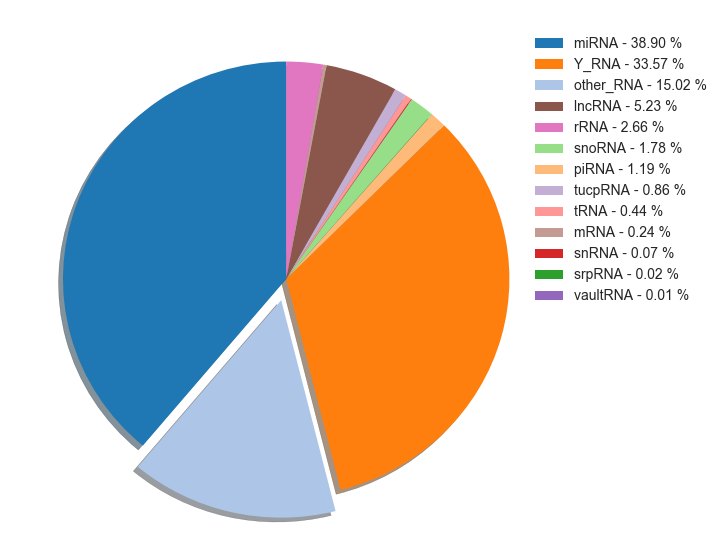

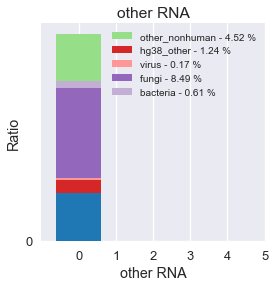

In [131]:
combine_show(3,1,0,20,10,14,10,
                0,0, 10,10,0, 0, 4,4,1.2)

In [11]:

x = mainpie
y = np.concatenate((allratiodata[0][0:1],np.array([otherrna]),allratiodata[0][1:-5] ))
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

def pie_plot(styind,contextind,exploderatio,width,height,fontsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig1, ax1 = plt.subplots(figsize=(10,10))
    patches, texts = ax1.pie(y, colors=(np.array(tableau20)/256.)[:13],  explode=np.concatenate((np.array([exploderatio]),np.array([0.1]),np.repeat(exploderatio,11))),#autopct='%1.1f%%',
                            shadow=True, startangle=90)

    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
               fontsize=fontsize)
interact(pie_plot,styind=FloatSlider(min=0,max=3,step=2),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         exploderatio=FloatSlider(min=0,max=0.1,step=0.01),
        fontsize=FloatSlider(min=8,max=20,step=1,value=12))

interactive(children=(FloatSlider(value=0.0, description=u'styind', max=3.0, step=2.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=0.0, description=u'exploderatio', max=0.1, step=0.01), FloatSlider(value=12.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=10.0, min=4.0, step=1.0), FloatSlider(value=12.0, description=u'fontsize', max=20.0, min=8.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.pie_plot>

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_bar(width,index,axes):
    '''
    data: sample*allrna  每行是所有样本  每列是一种rna
    '''
    data = allratiodata[index]
    N = data.shape[0]
    ind = np.arange(N) 
    ax = axes
    p={}
    p[0] = ax.bar(ind,data[:,0],width,color = np.array(tableau20)[0]/float(256))
    countarr = np.cumsum(data,axis=1)
    for t in np.arange(1,data.shape[1]):
        p[t] = plt.bar(ind,data[:,t],width,bottom=countarr[:,t-1],
                       color=np.array(tableau20)[t]/float(256))
    ax.set_ylabel('Ratio')
    ax.set_title('Ratio bar for some order: '+str(index[0])+' - '+str(index[-1]))
    ax.set_xticks(ind)
    ax.set_yticks(np.arange(0, 1))
    ax.legend(([p[m] for m in range(data.shape[1])]), (rnanames))

In [ ]:
N = 10
[allratiodata[np.arange(0,N)][:,i] for i in range(4)][m] for m in range(N)

In [7]:
def get_rnanameind():
    wholenum = 864
    rankin1 = np.array(list(itertools.permutations(np.arange(1,4))))
    rankin2 = np.array(list(itertools.permutations(np.arange(4,8))))
    rankin3 = np.array(list(itertools.permutations(np.arange(8,11))))
    rankind = np.zeros([wholenum,11]).astype('int')
    for i in range(6):
        for j in range(24):
            for t in range(6):
                rankind[i*144+j*6+t,1:] =\
                np.concatenate((rankin1[i],rankin2[j],rankin3[t]))
    return rankind
rankind = get_rnanameind()

In [ ]:
N = data.shape[0]
ind = np.arange(N) 
width=0.3
plt.figure(figsize=(20,10))
p={}
p[0] = plt.bar(ind,data[:,0],width,color = np.array(tableau20)[0]/float(256))
countarr = data[:,0]
for i in np.arange(1,data.shape[1]):
    p[i] = plt.bar(ind,data[:,i],width,bottom=countarr,color=np.array(tableau20)[i]/float(256))
    countarr+=data[:,i]
plt.ylabel('Ratio')
plt.title('Ratio bar for some order')
plt.xticks(ind, np.arange(0,16))
plt.yticks(np.arange(0, 1))
plt.legend(([p[i] for i in range(data.shape[1])]), (rnanames))

array([[2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2, 3, 1],
       [2,

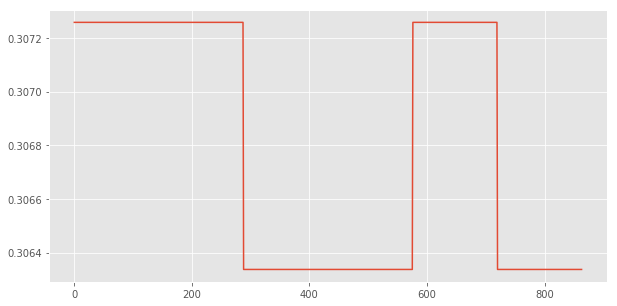

In [184]:
plt.figure(figsize=(10,5))
plt.plot(allratiodata[:,1])
rankind[450:700,1:4]

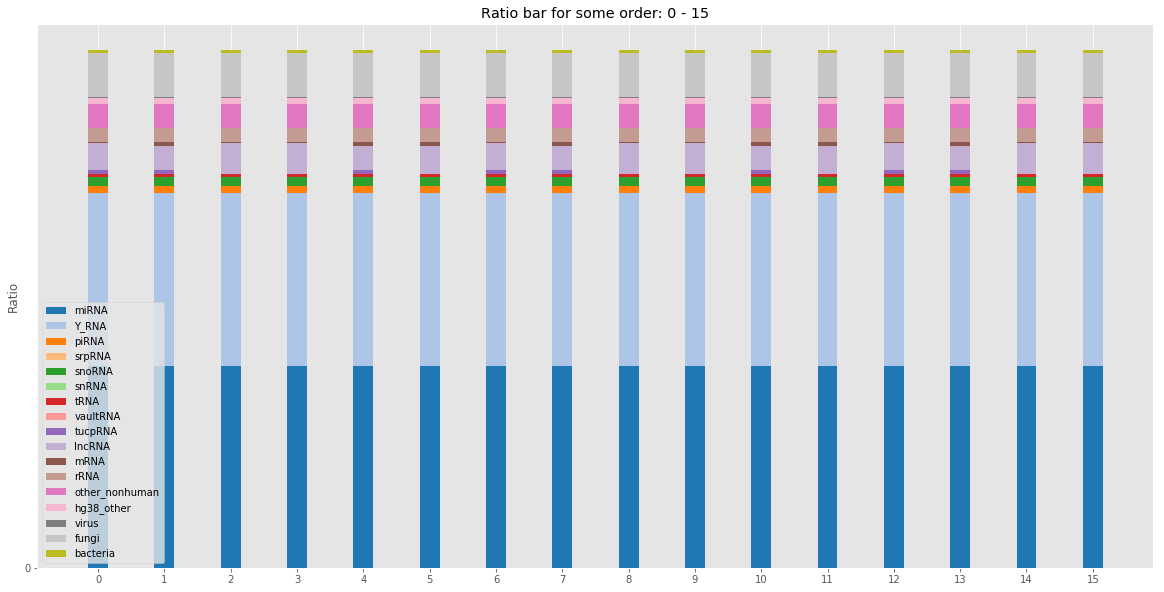

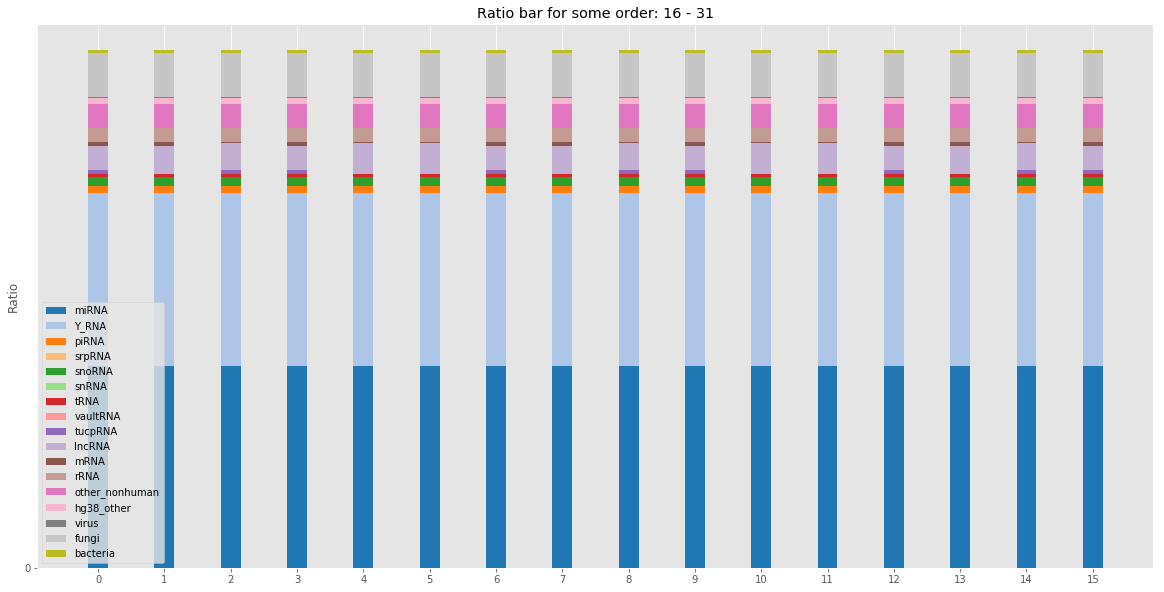

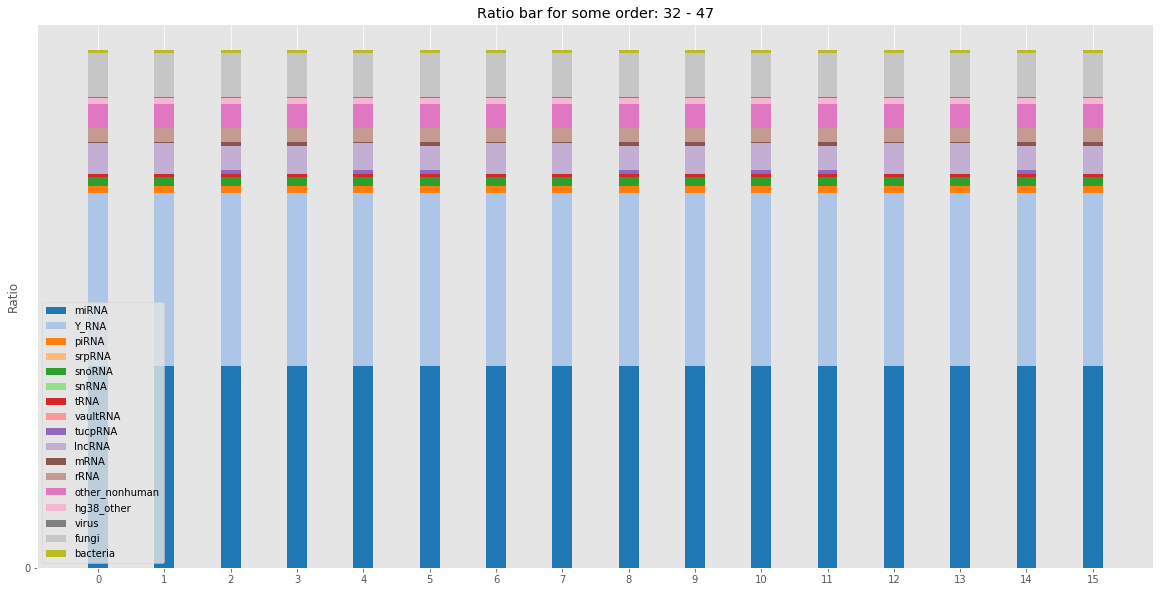

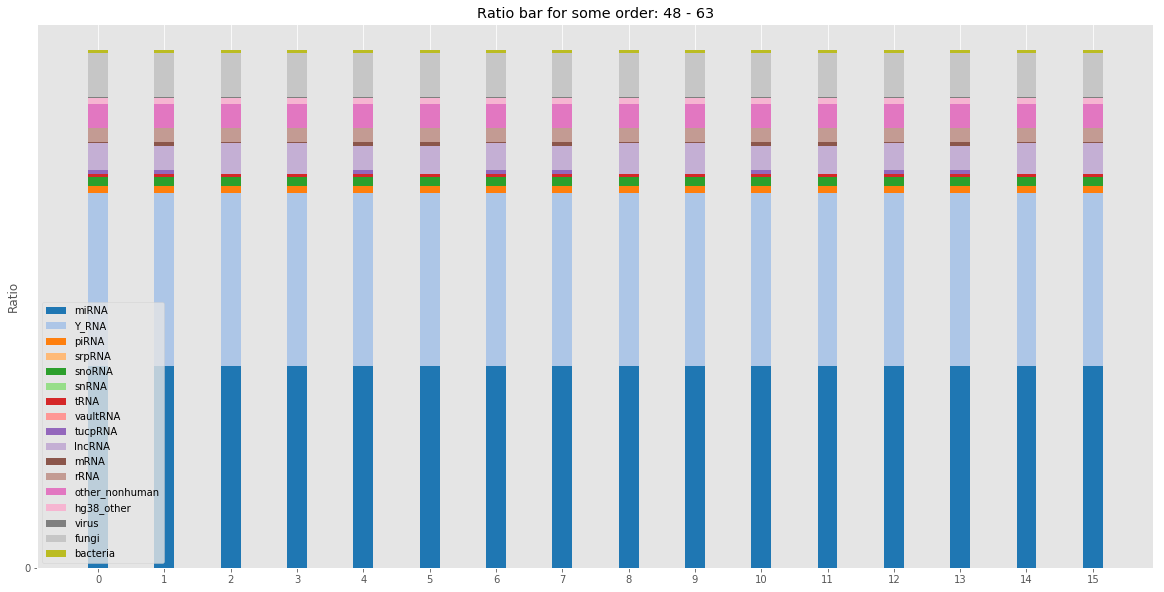

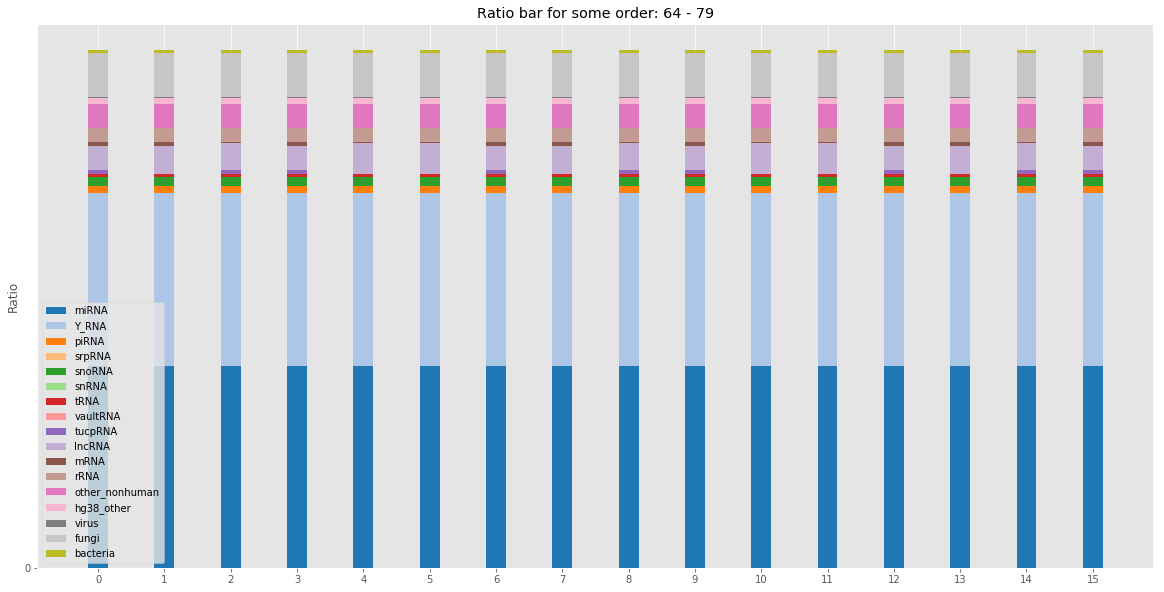

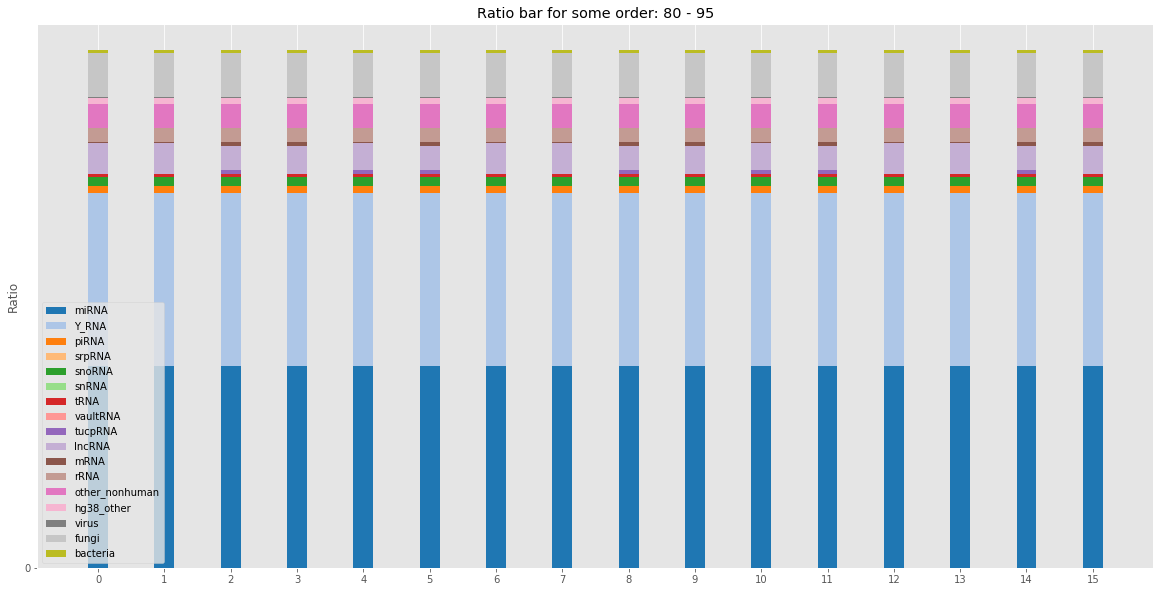

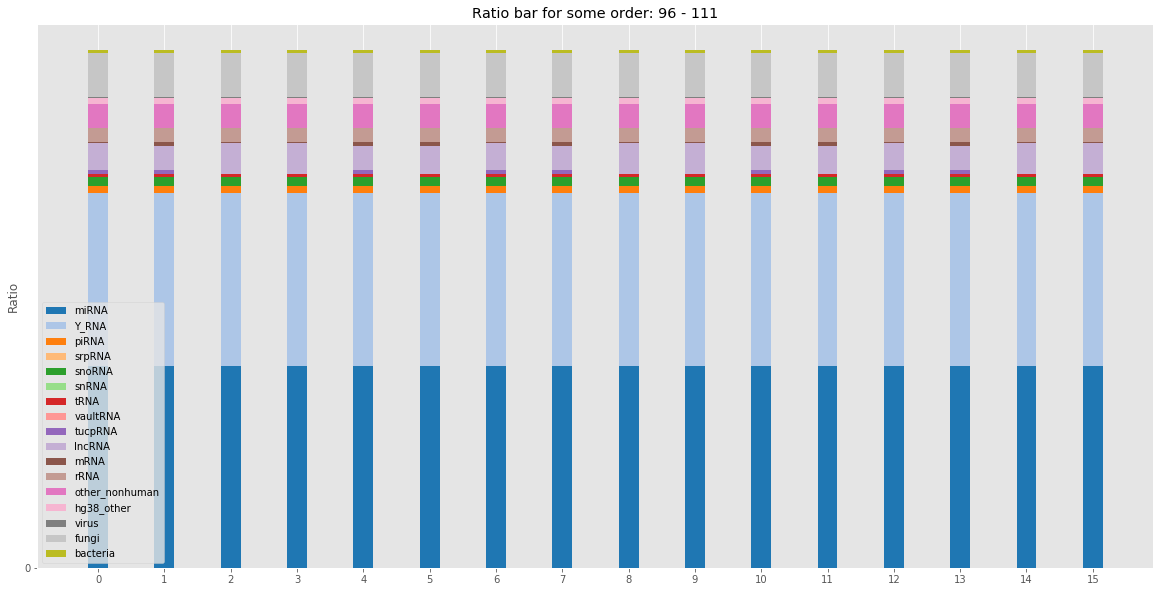

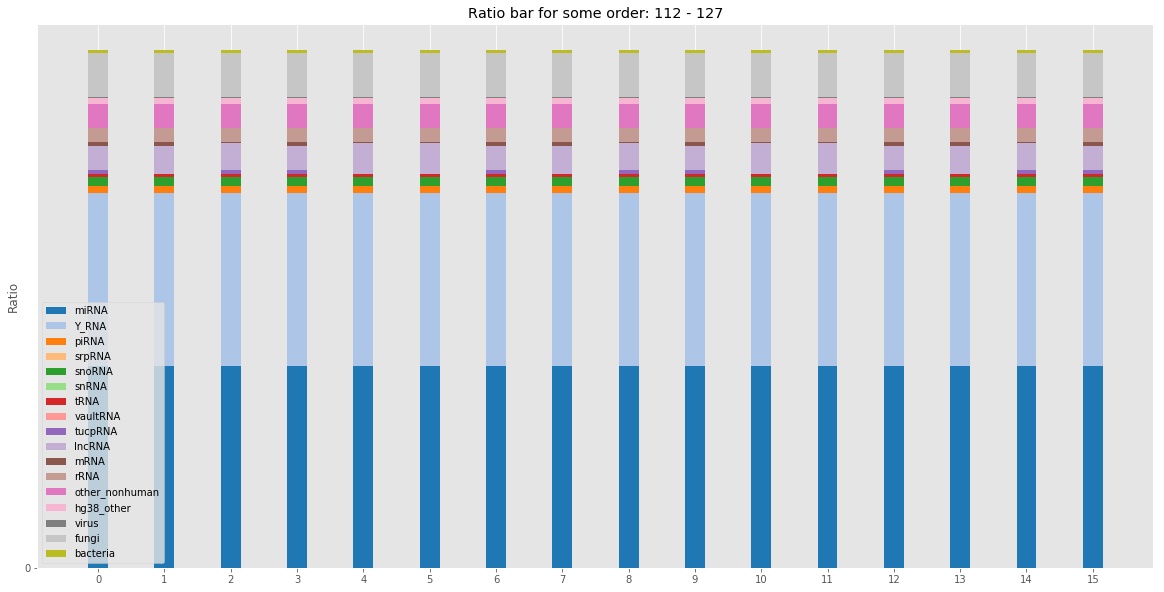

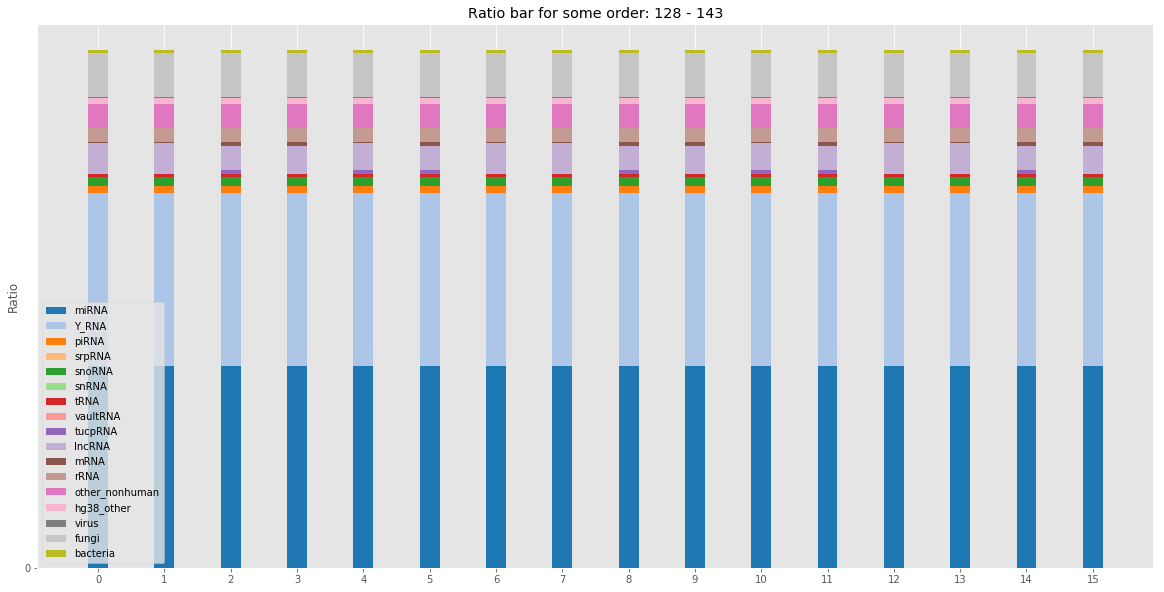

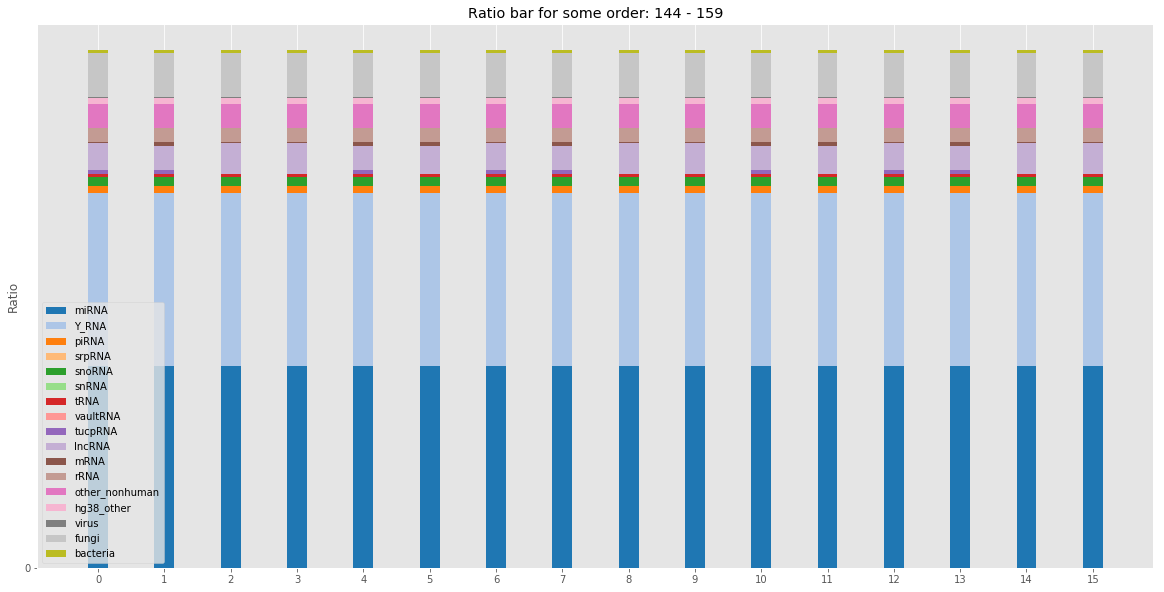

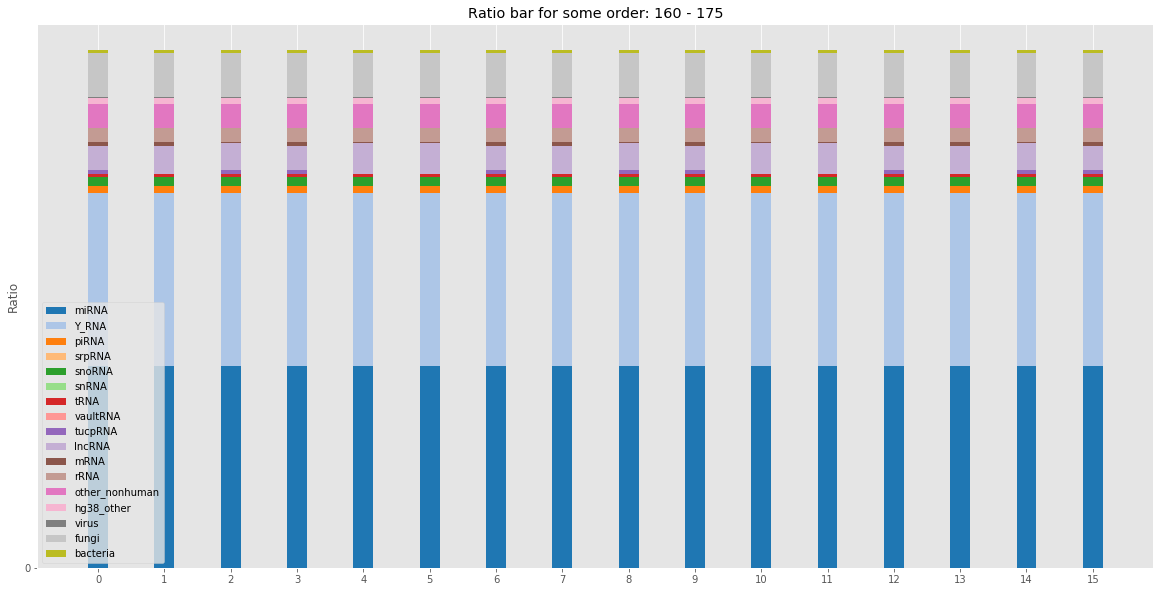

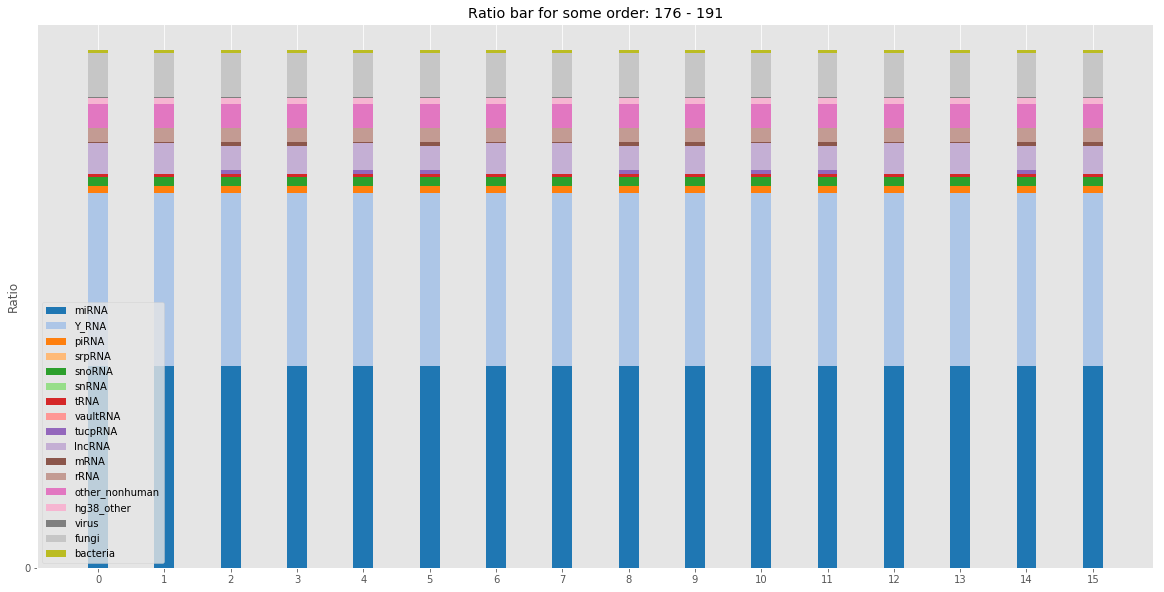

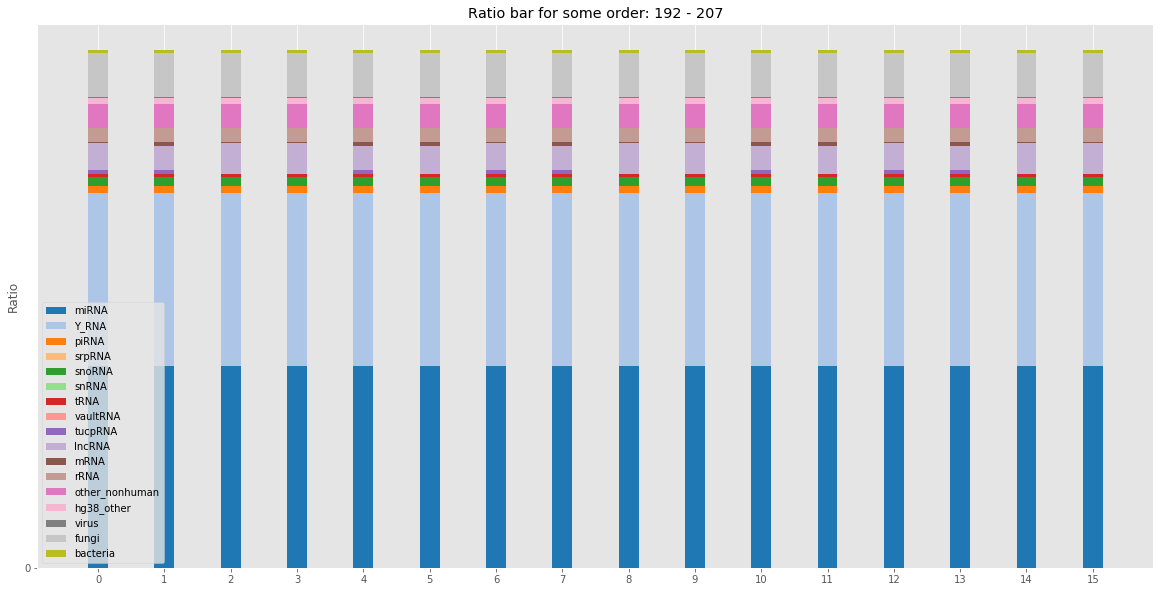

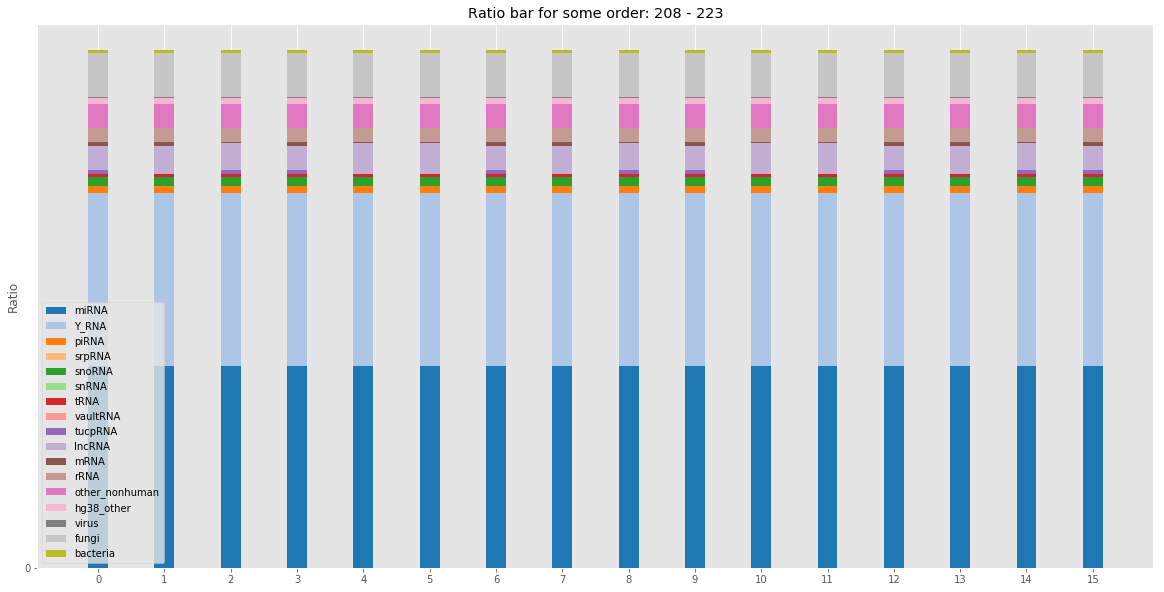

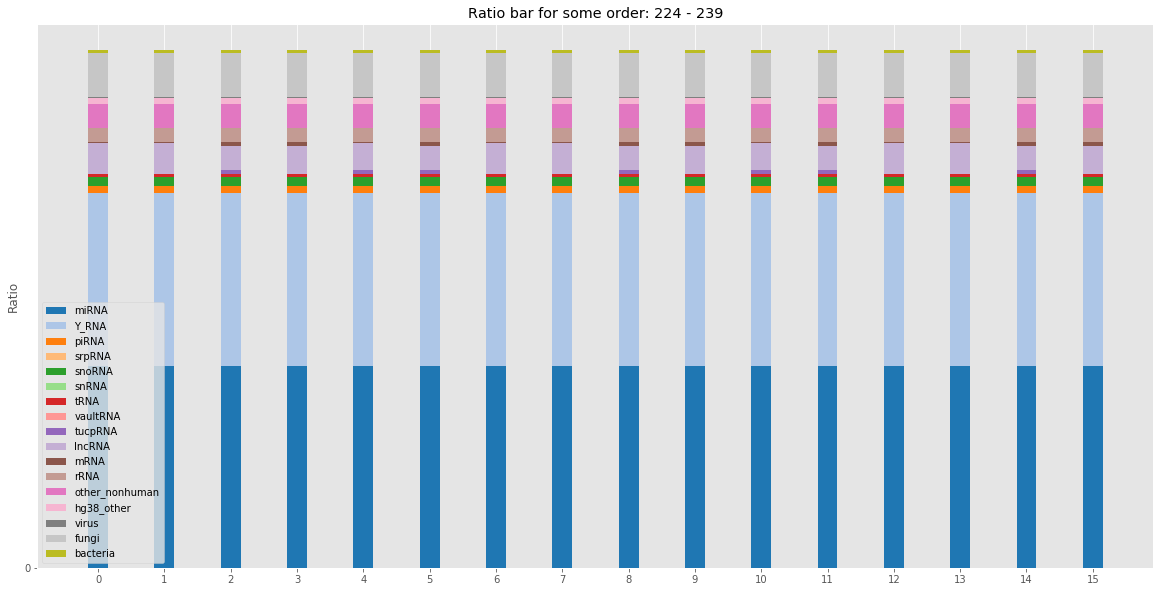

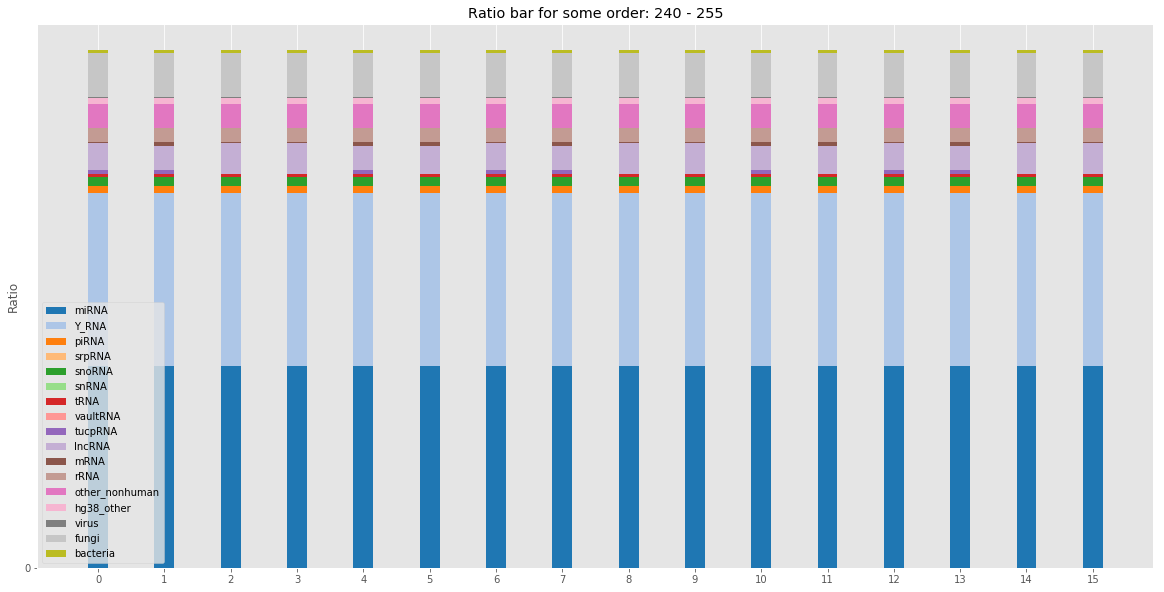

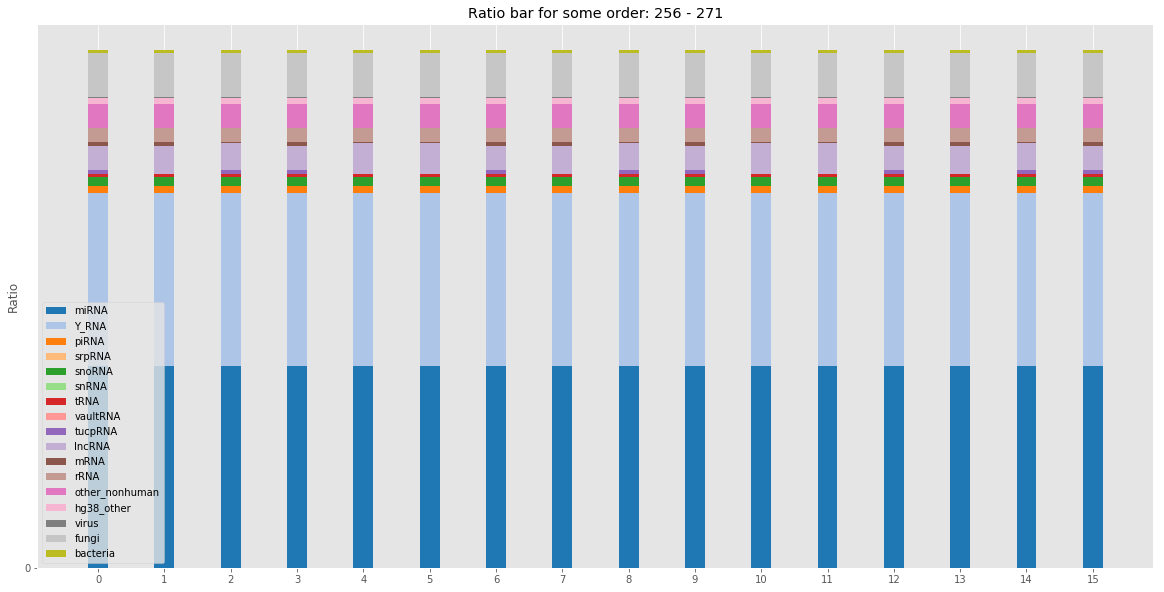

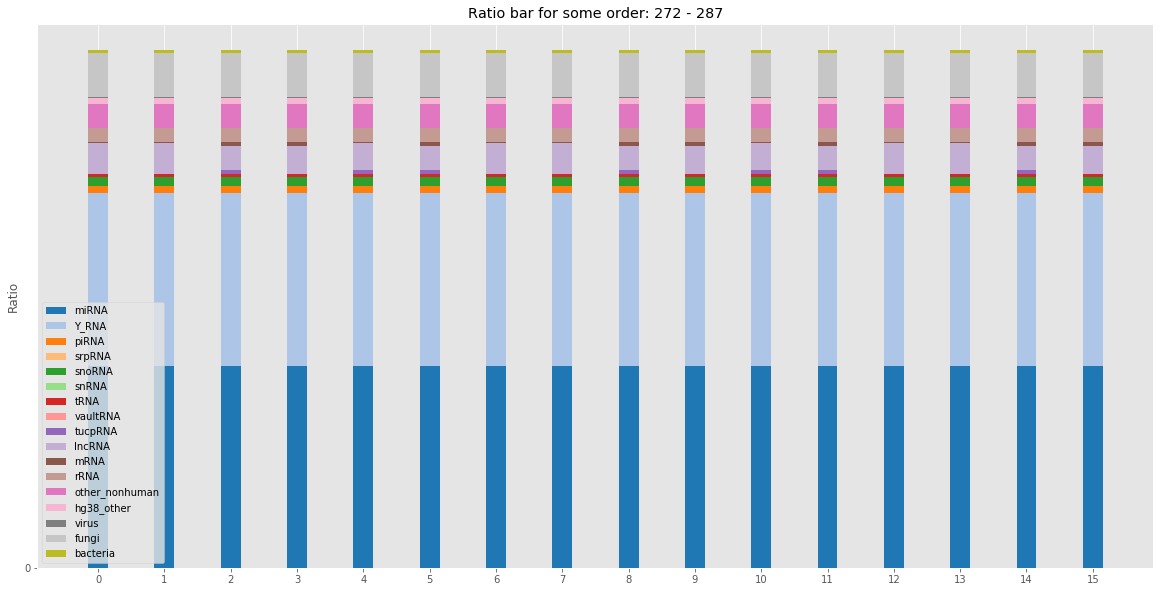

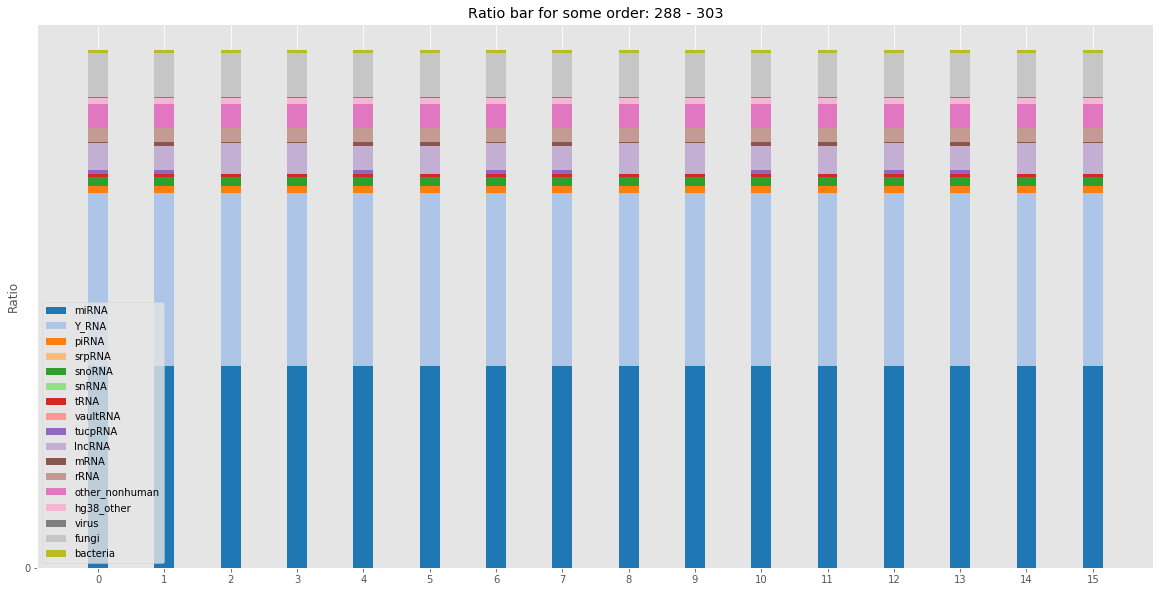

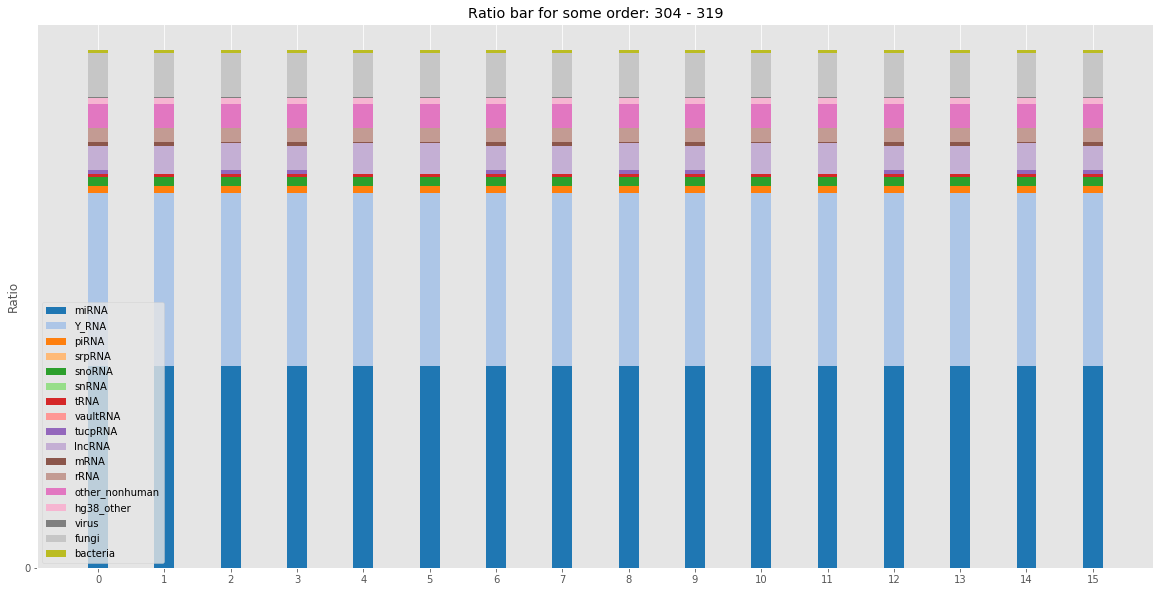

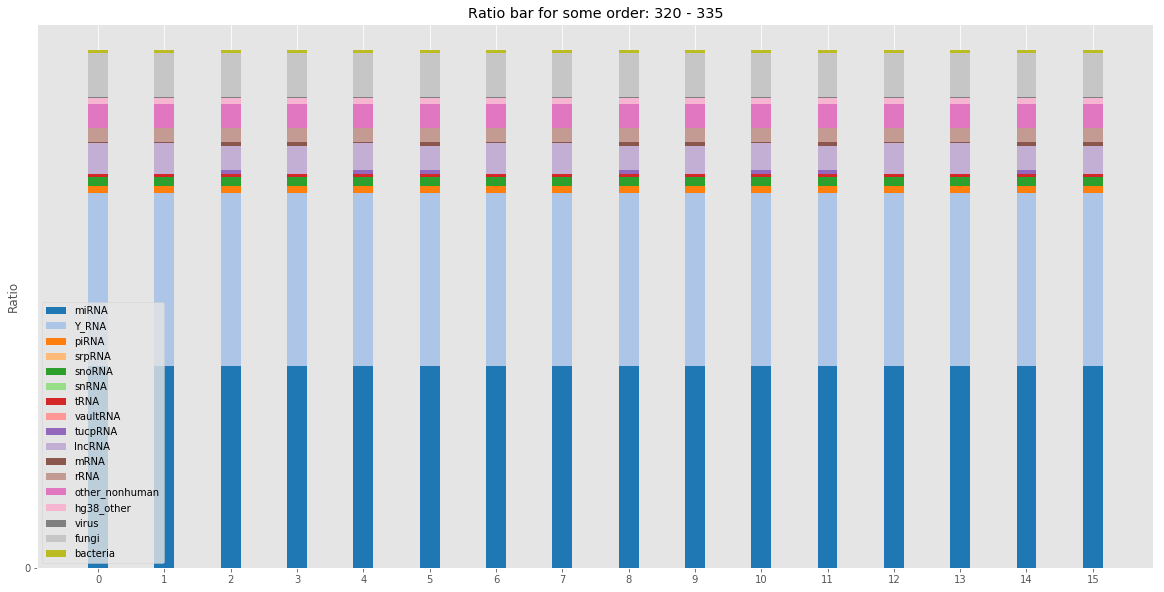

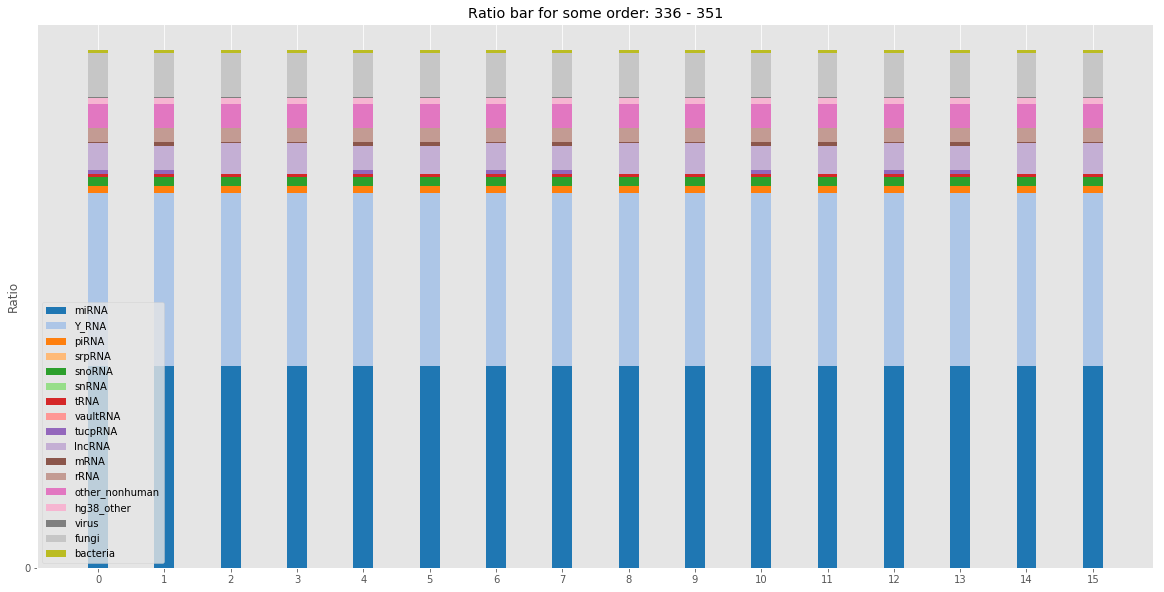

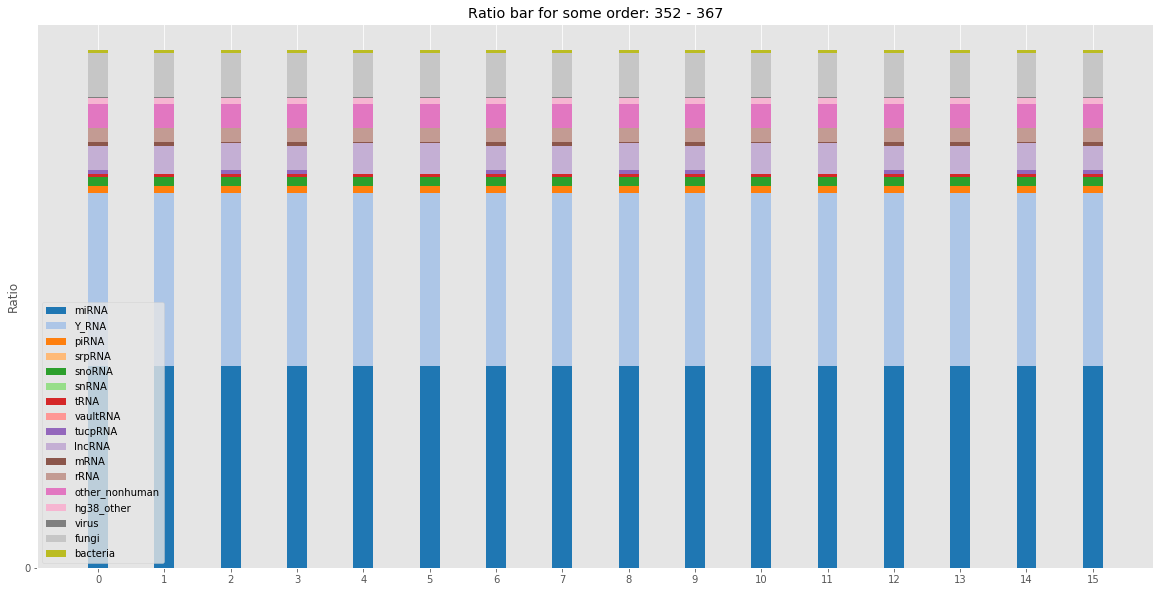

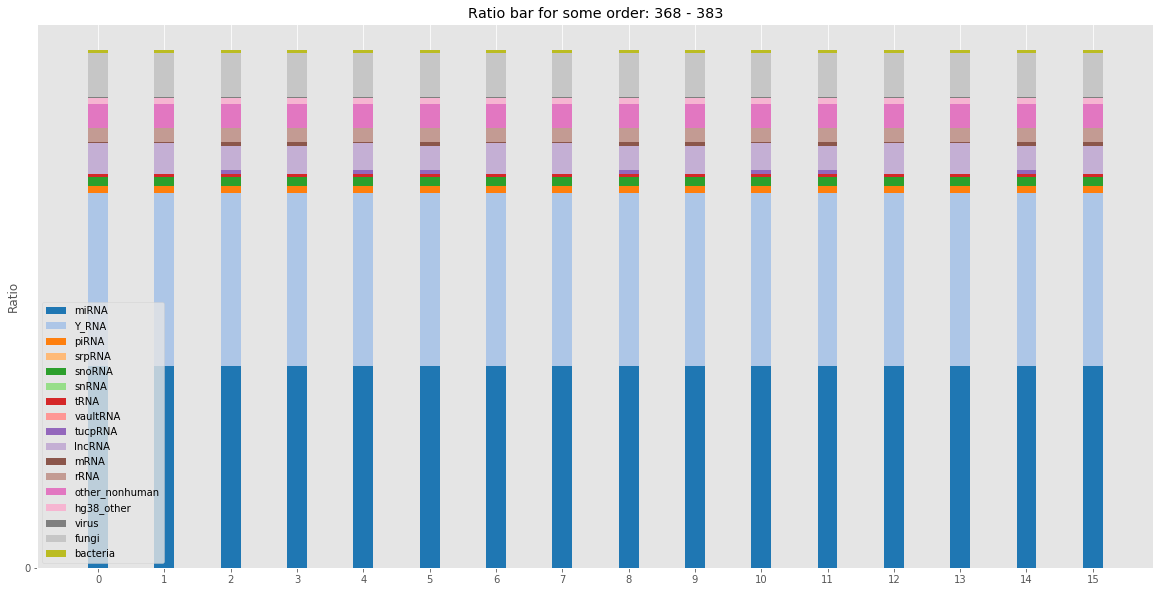

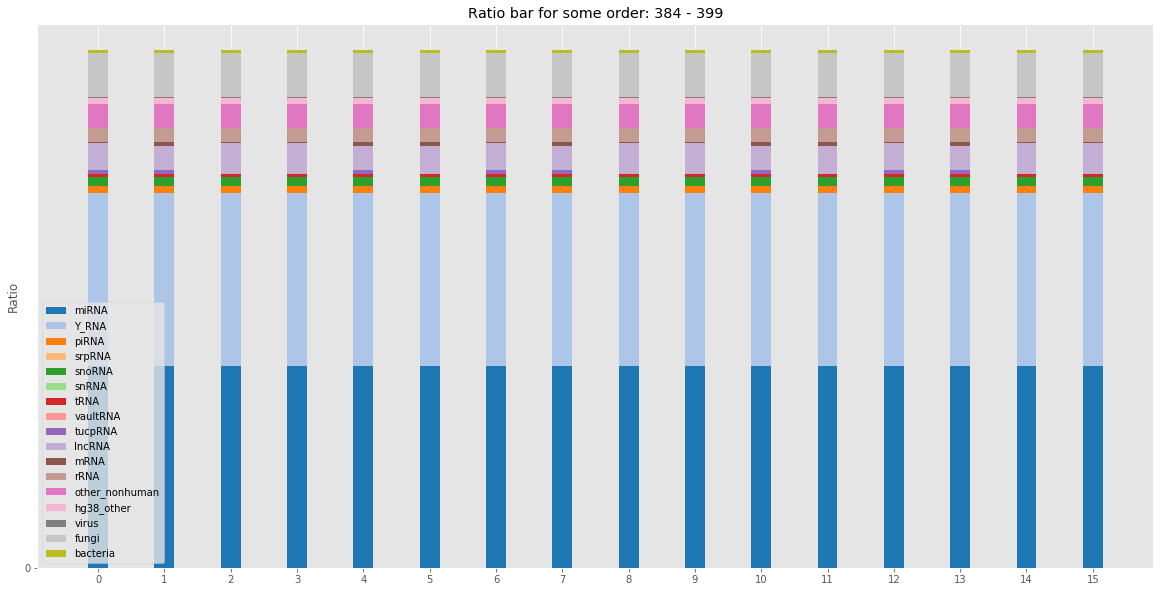

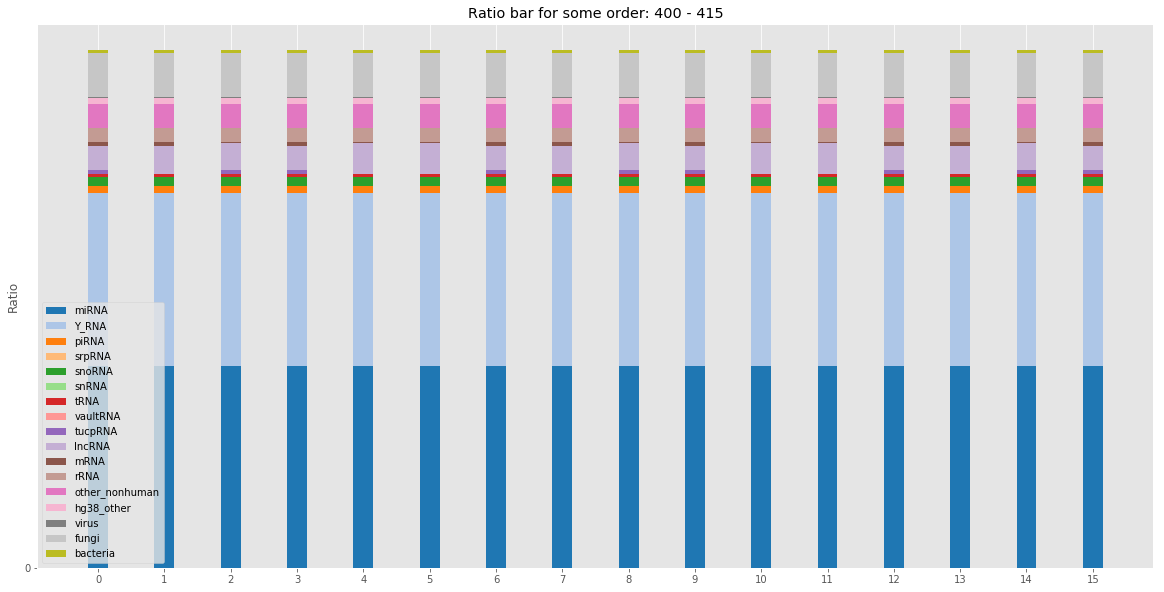

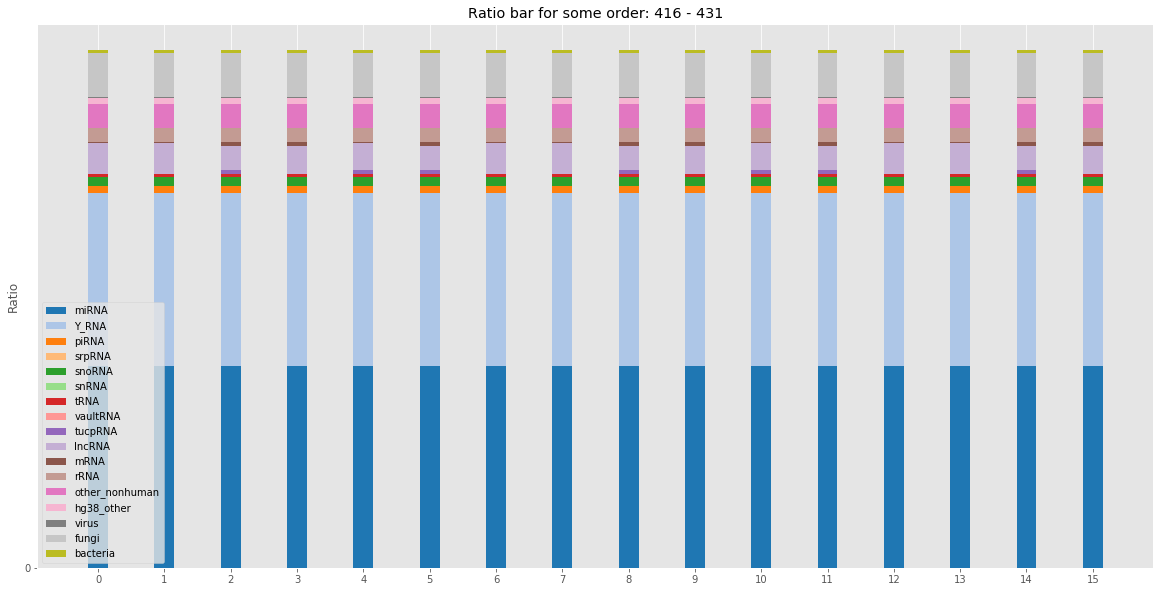

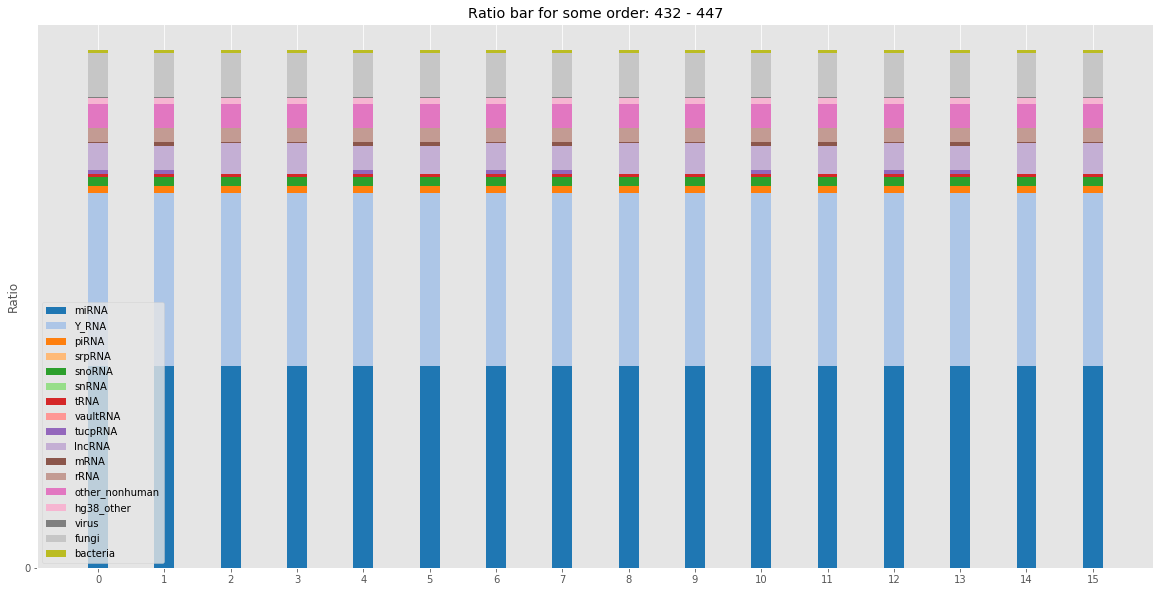

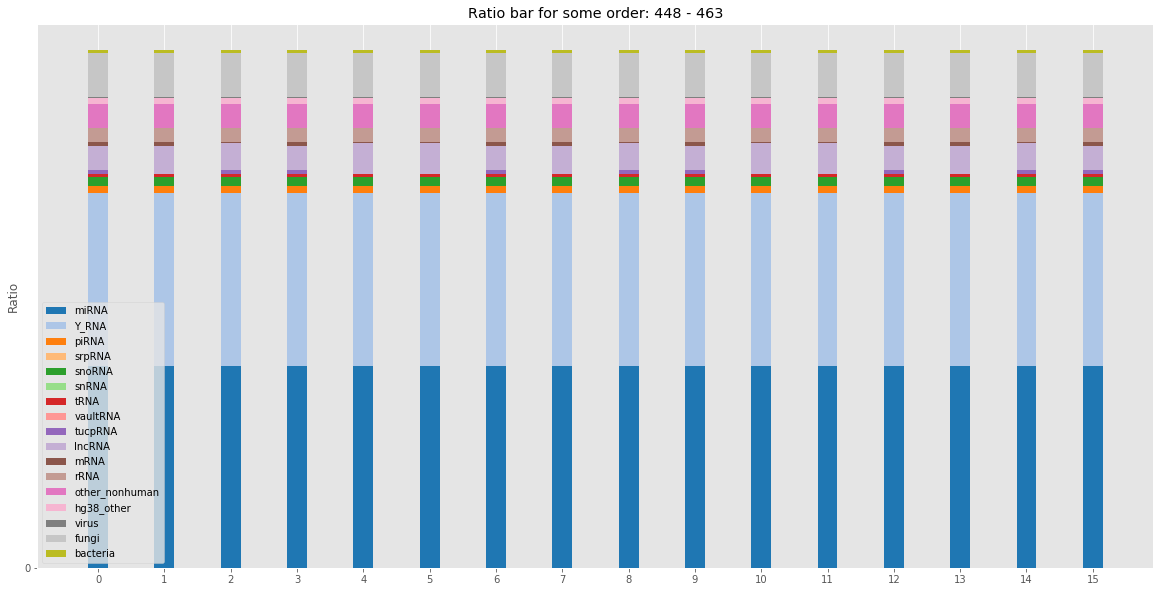

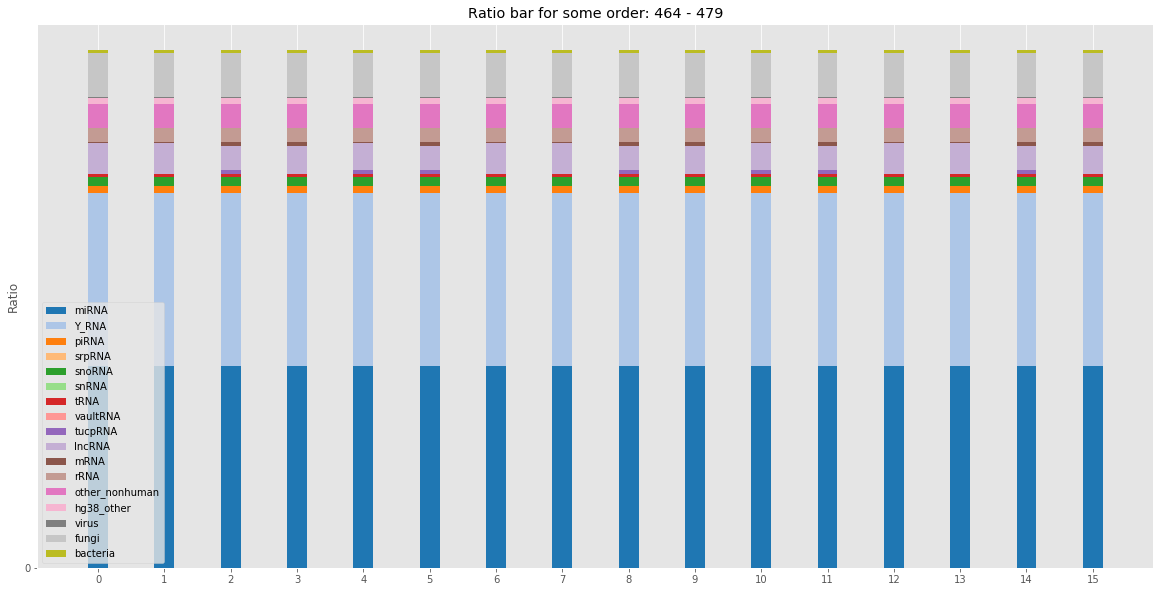

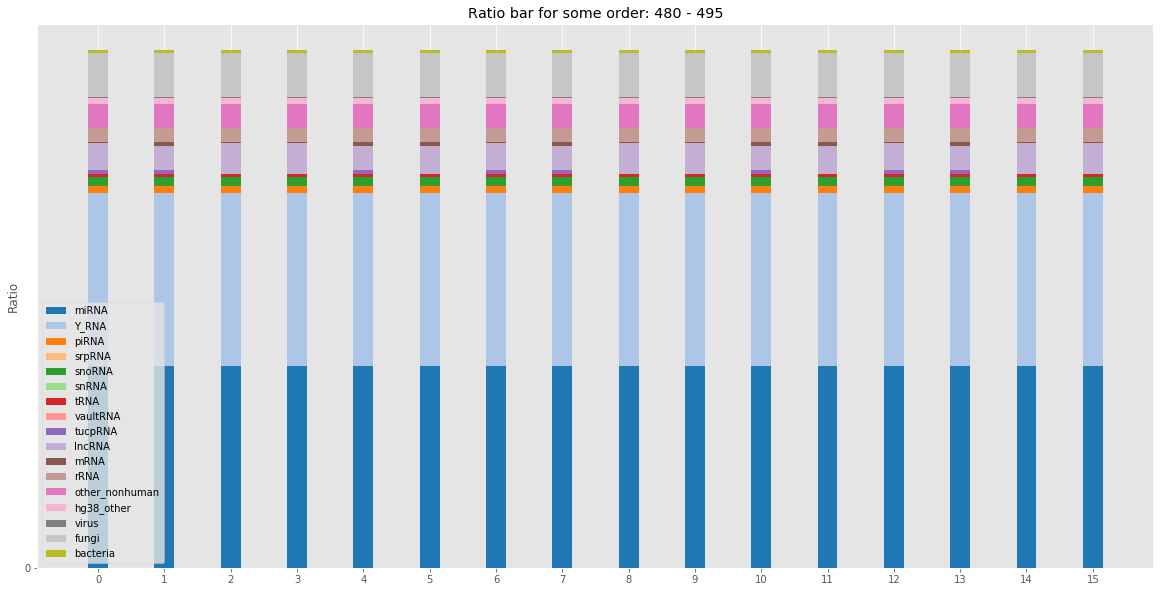

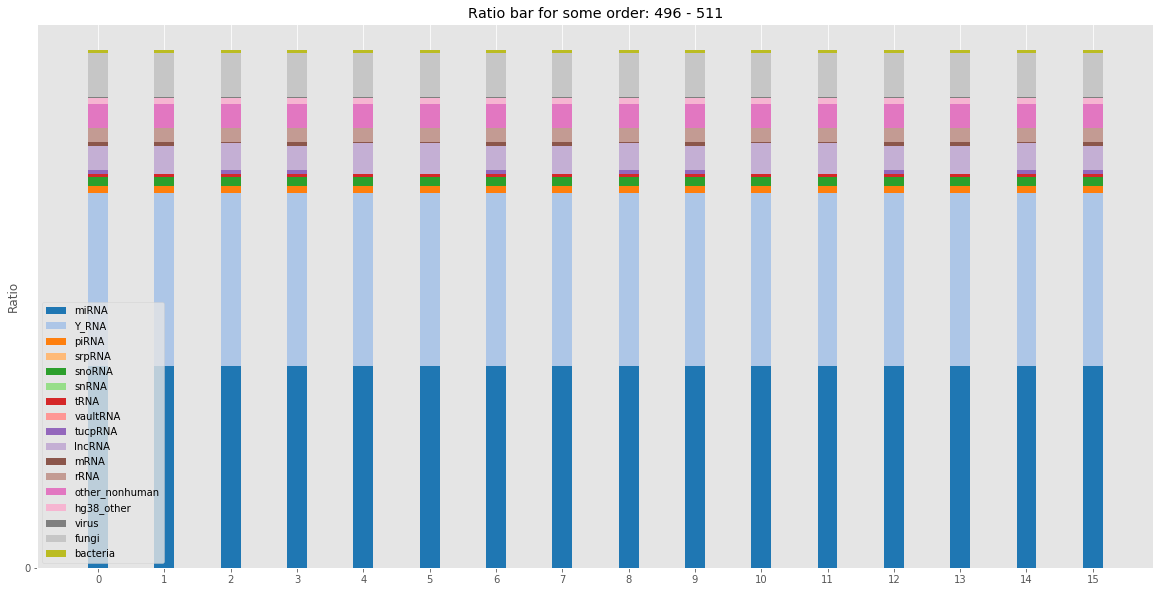

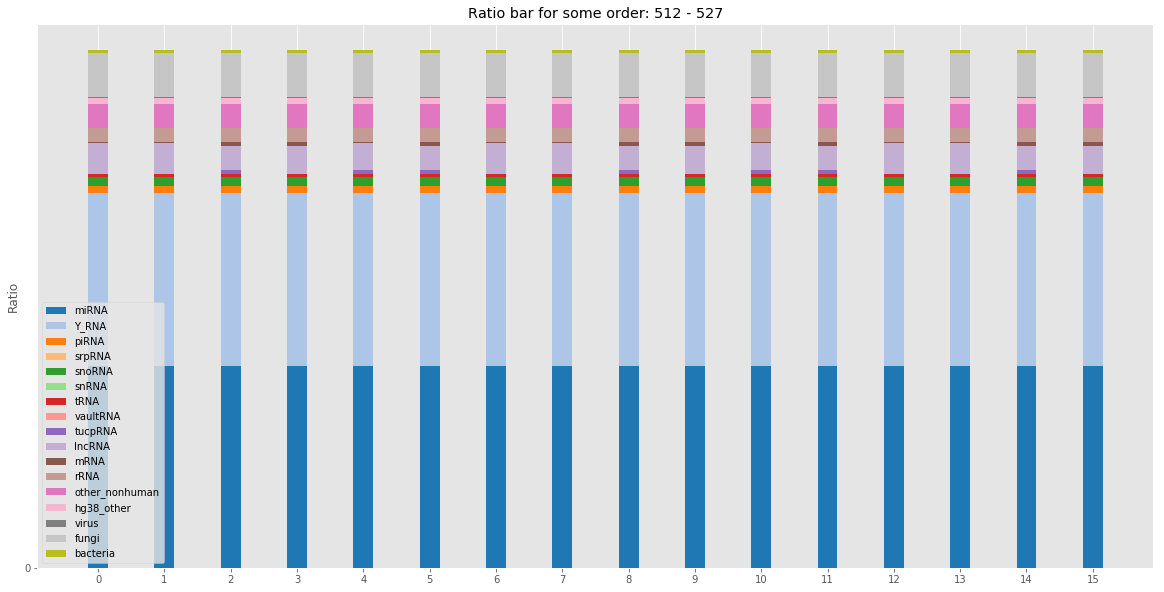

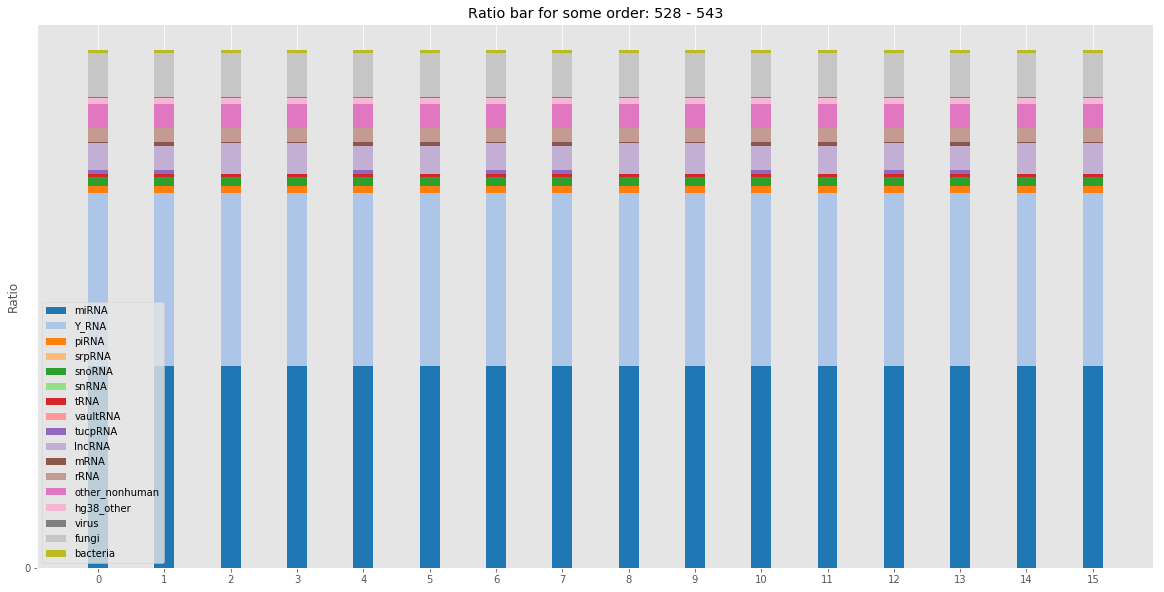

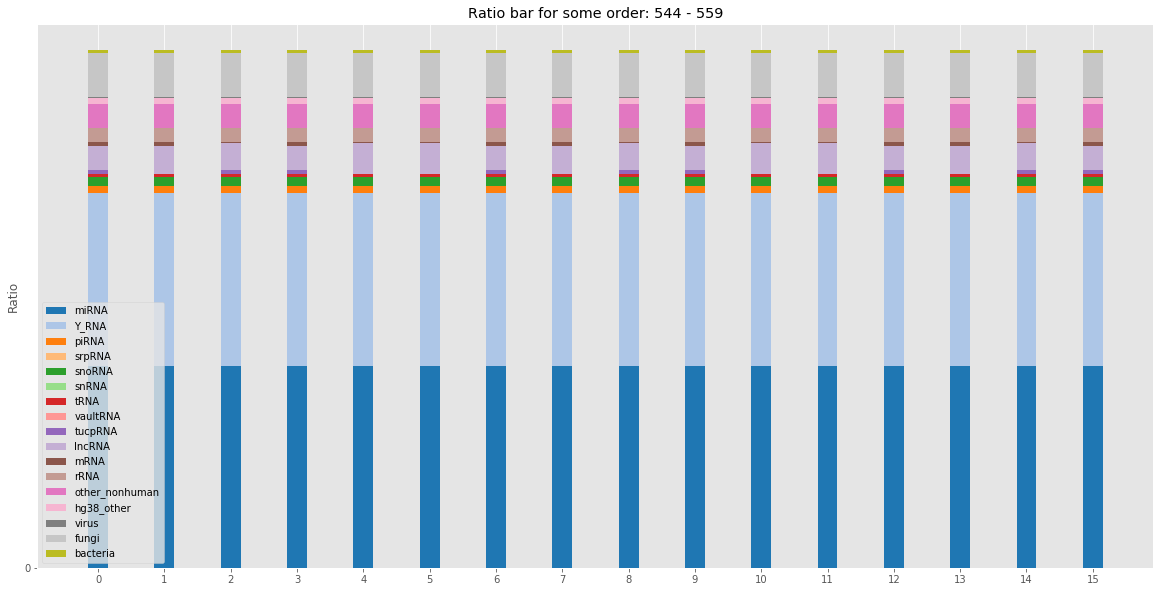

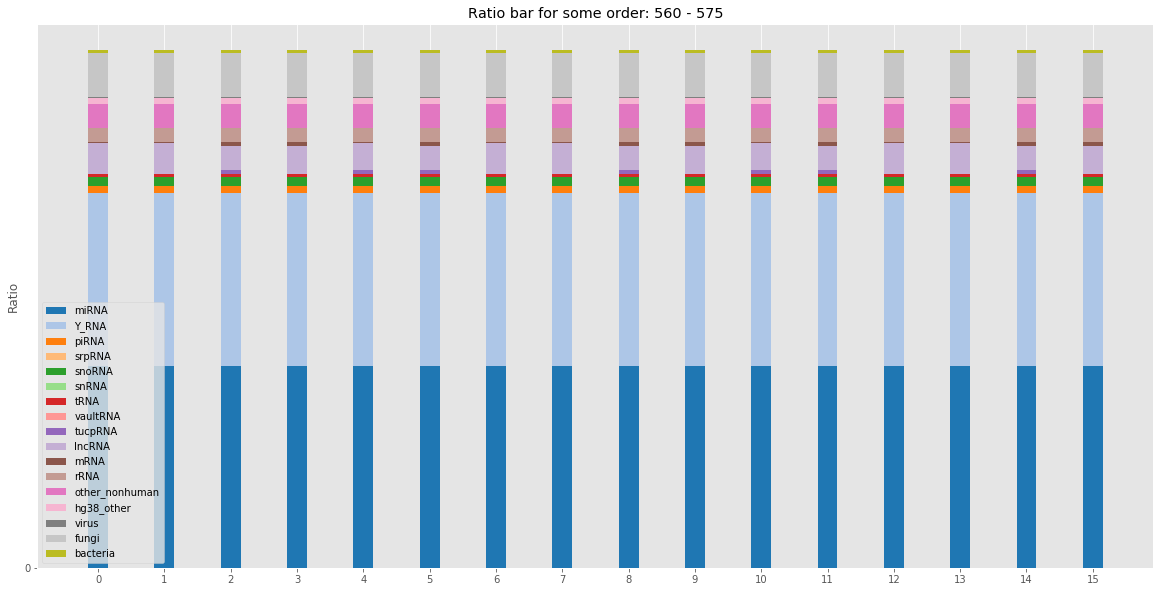

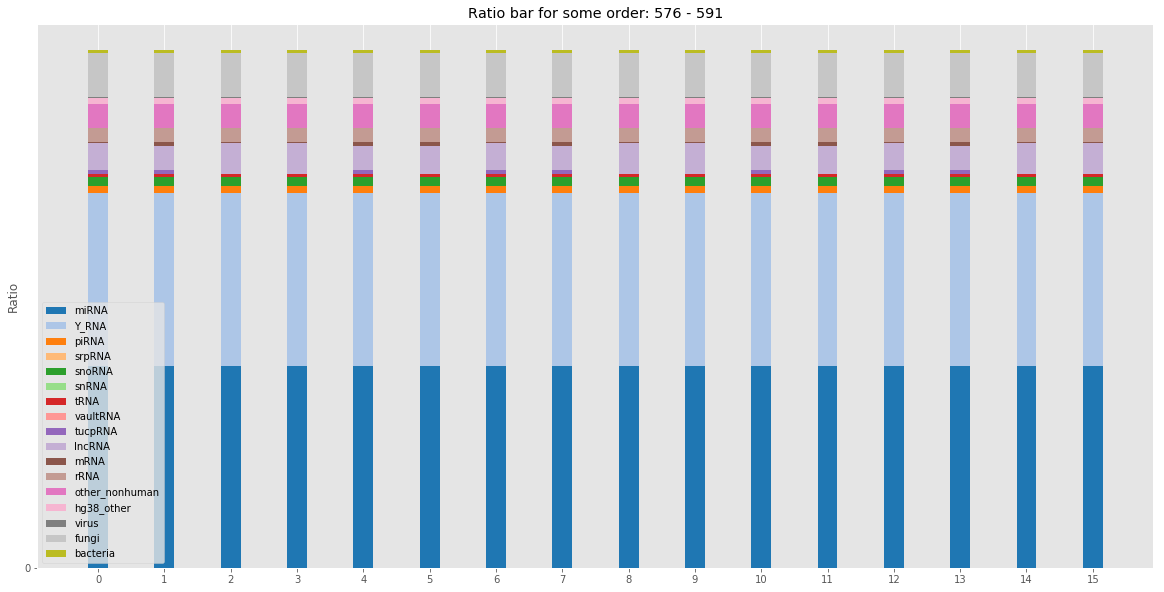

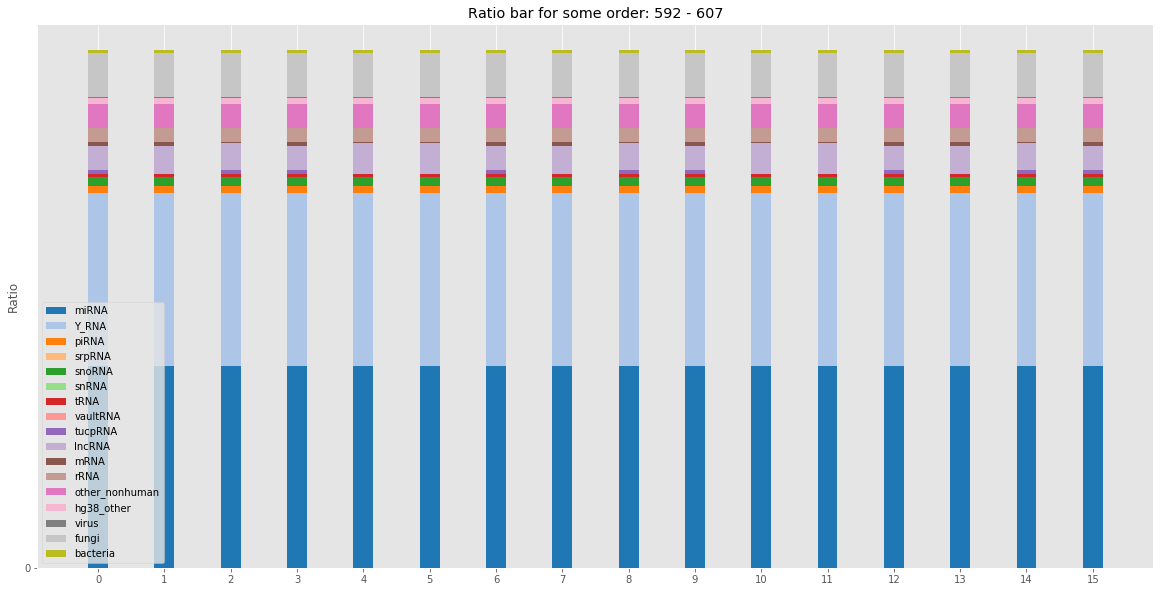

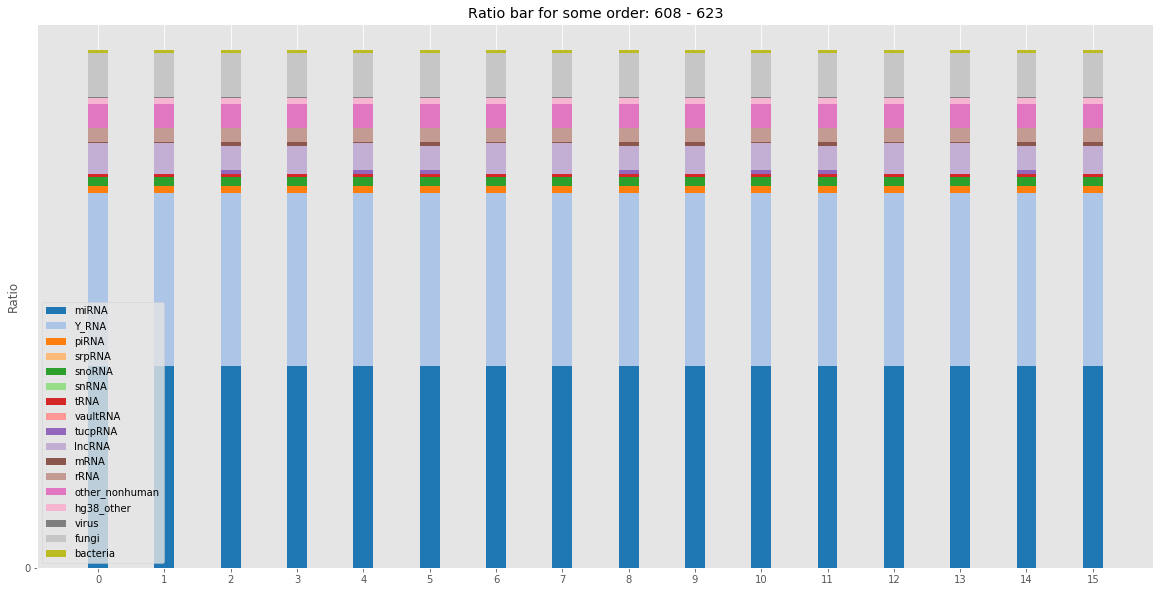

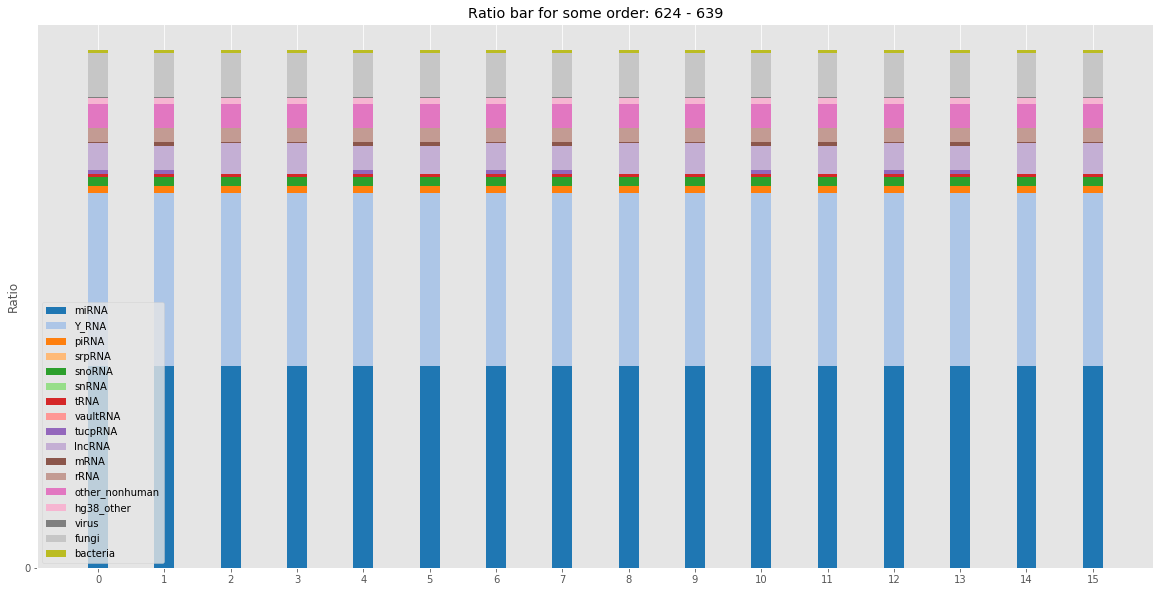

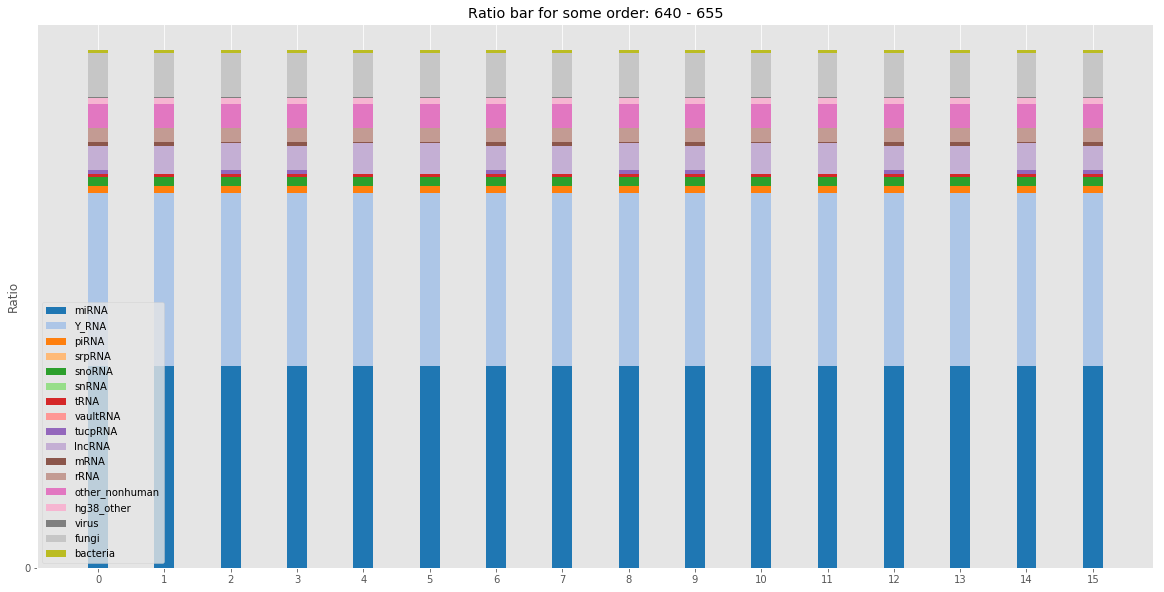

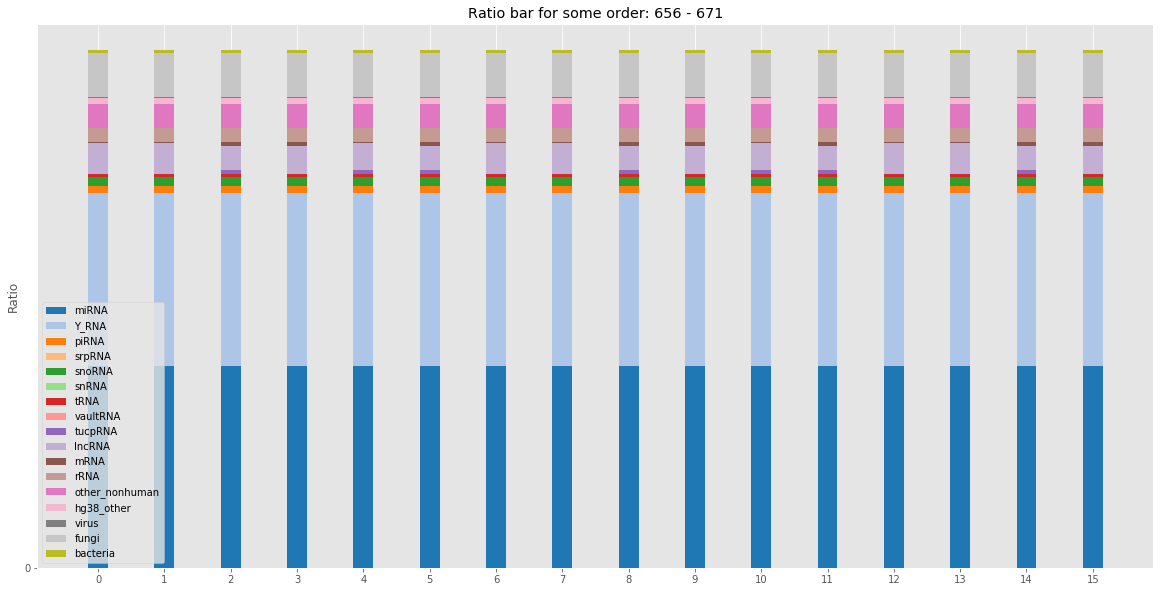

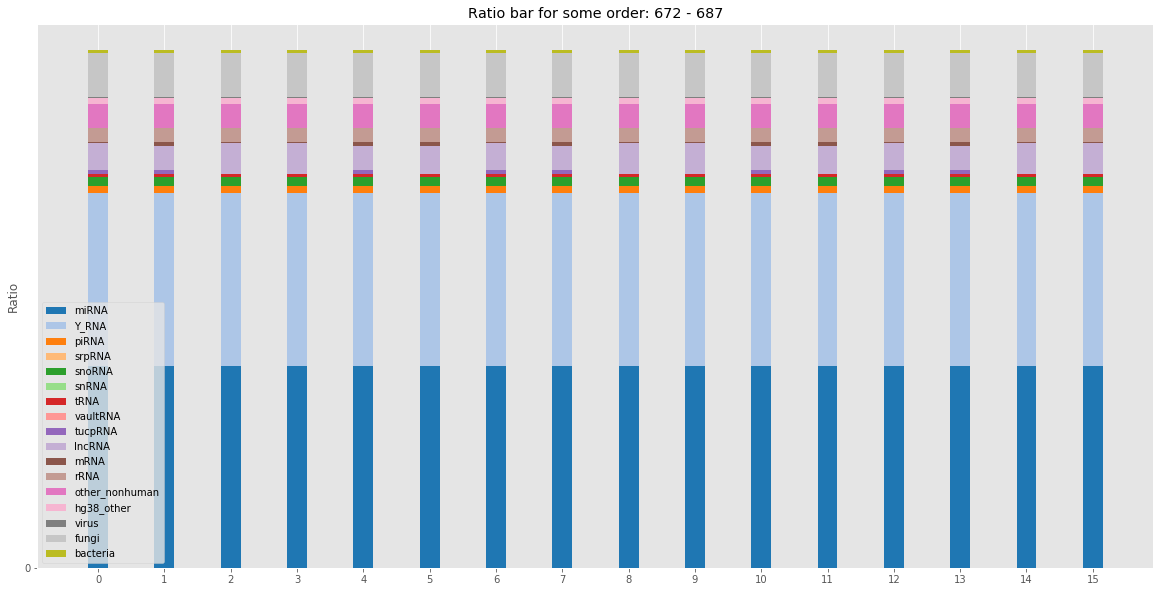

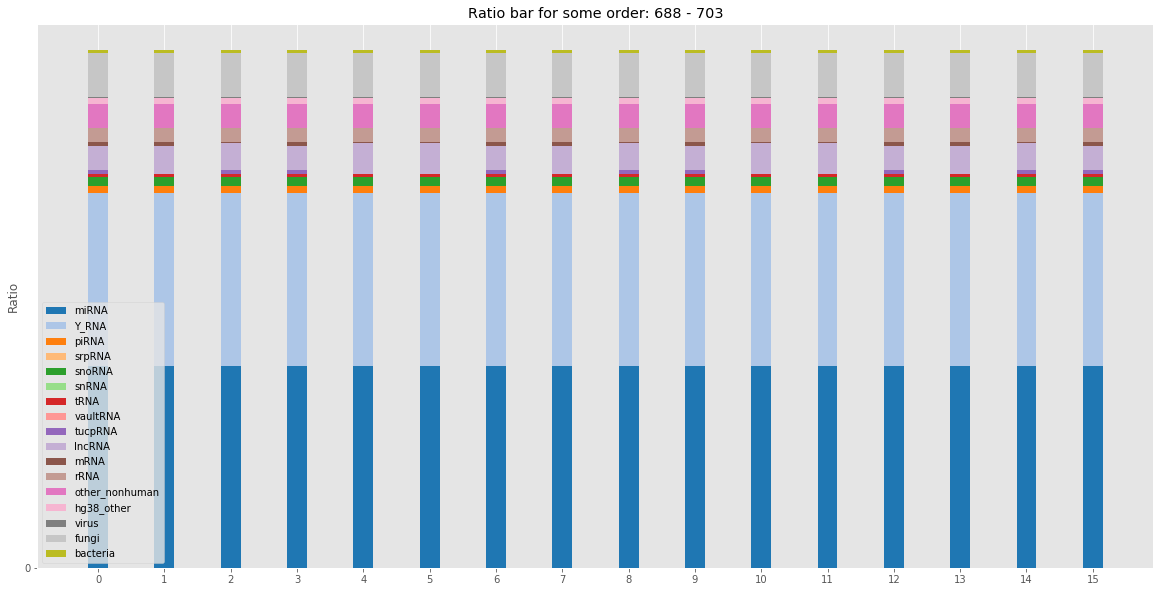

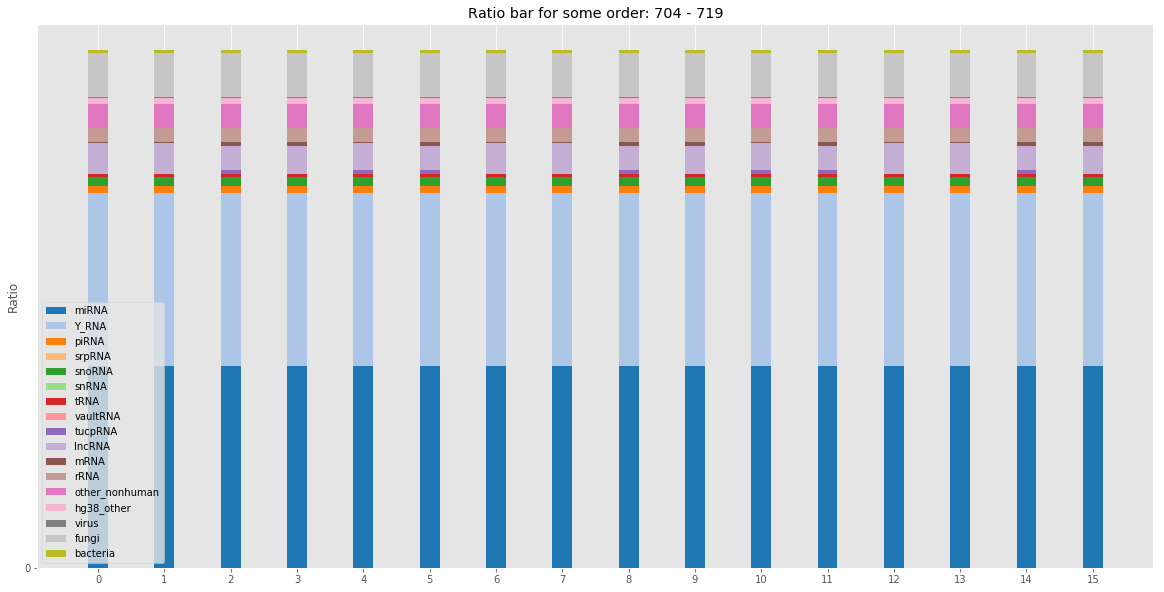

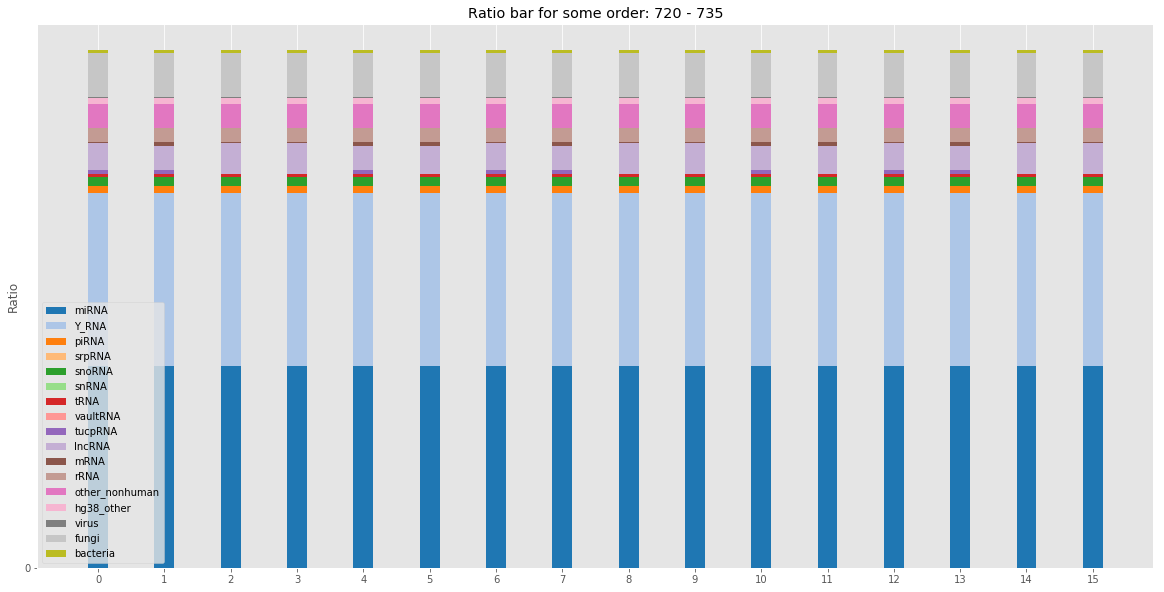

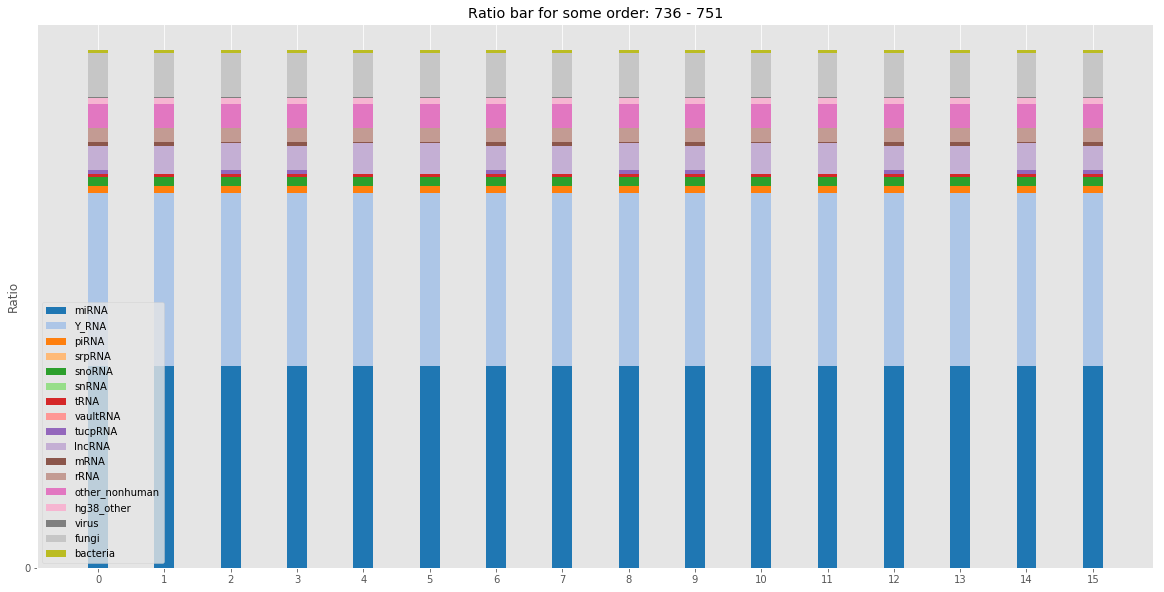

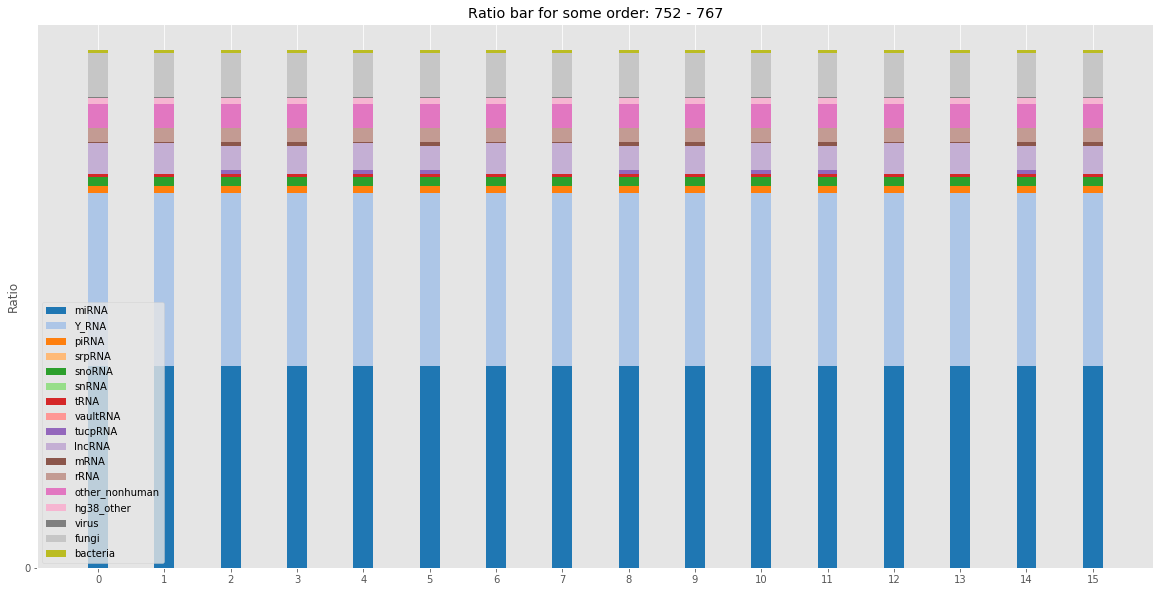

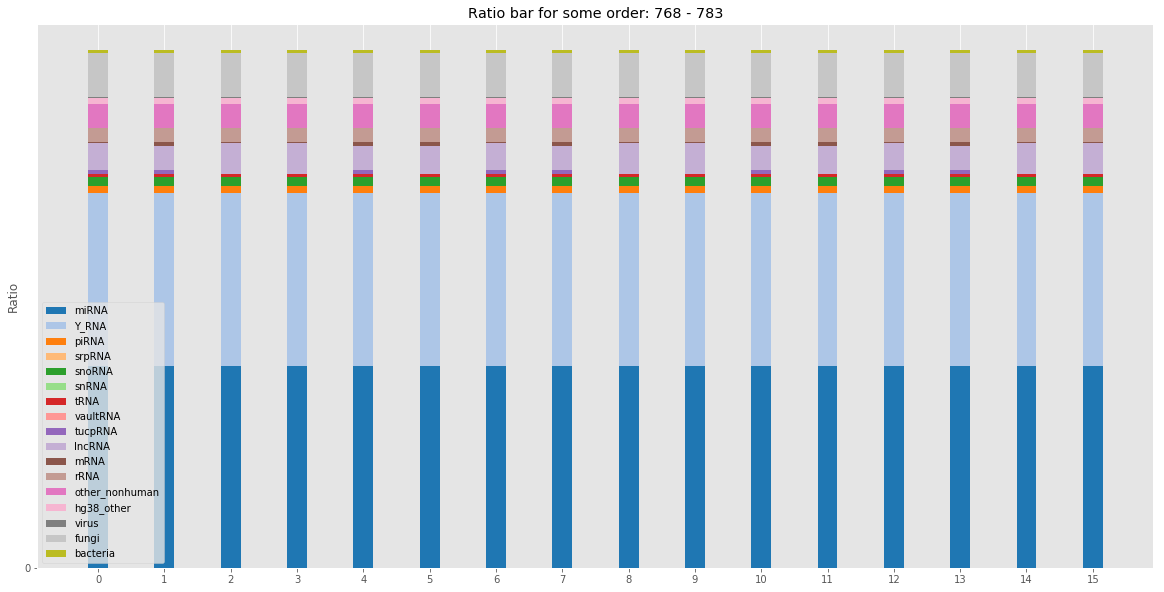

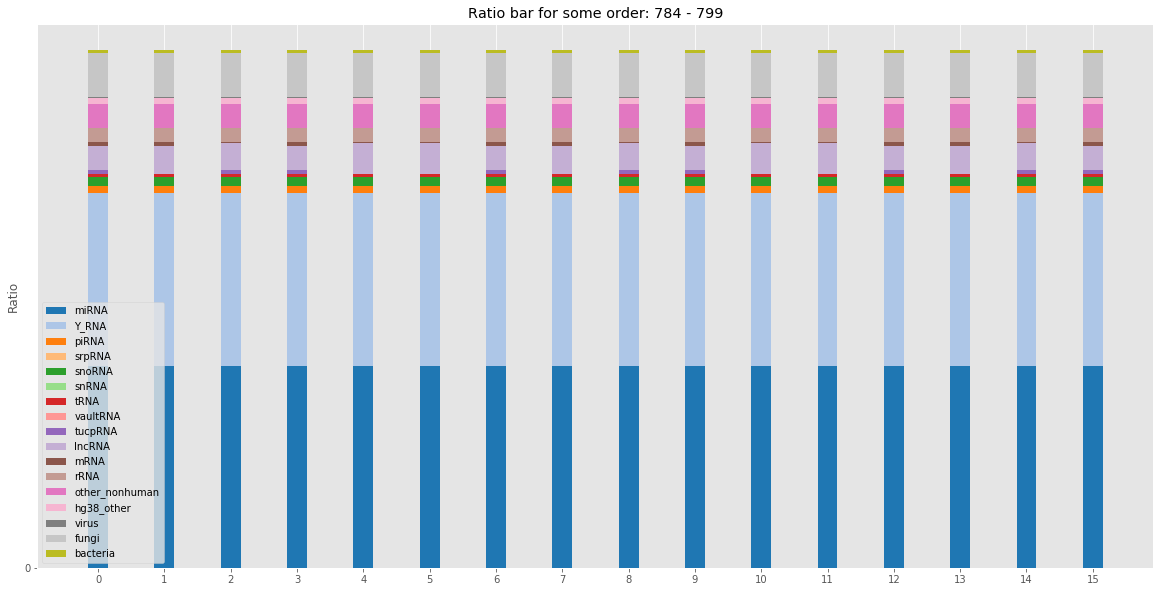

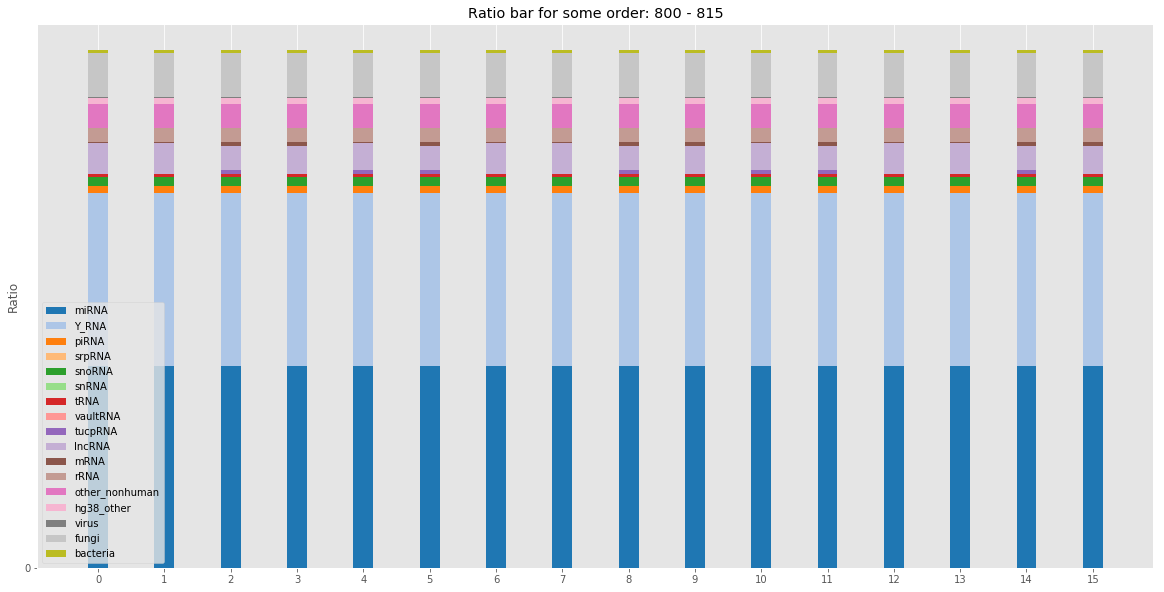

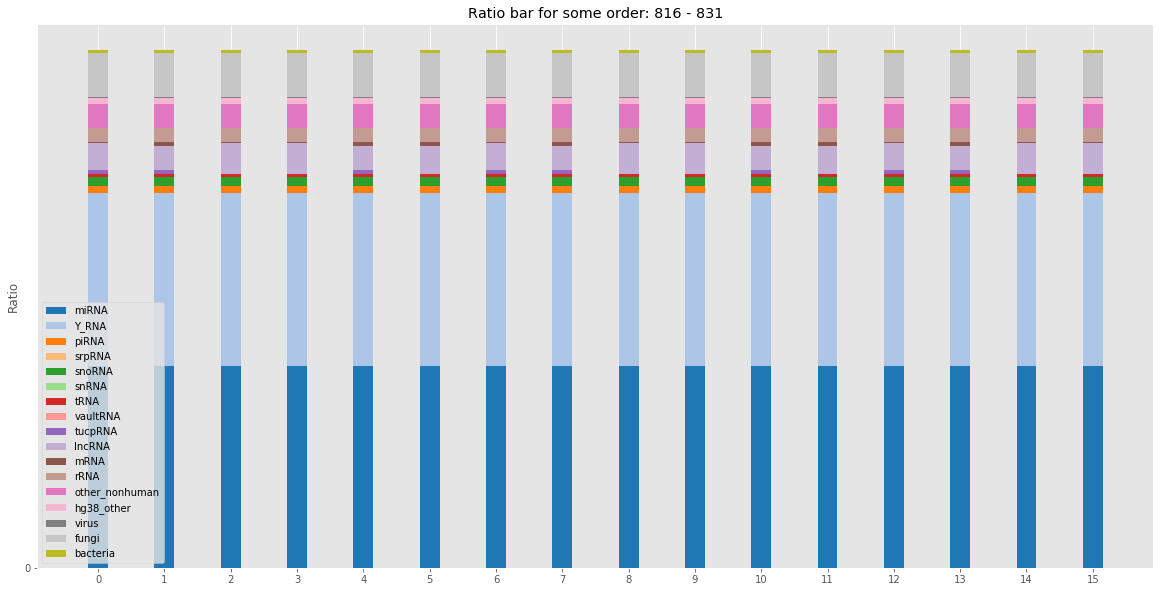

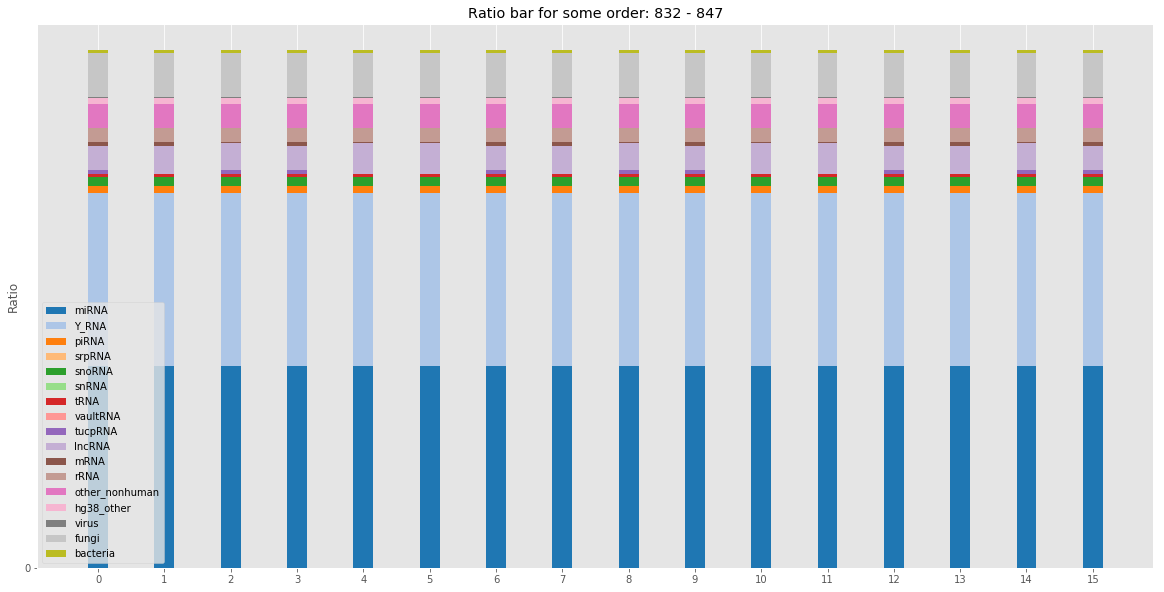

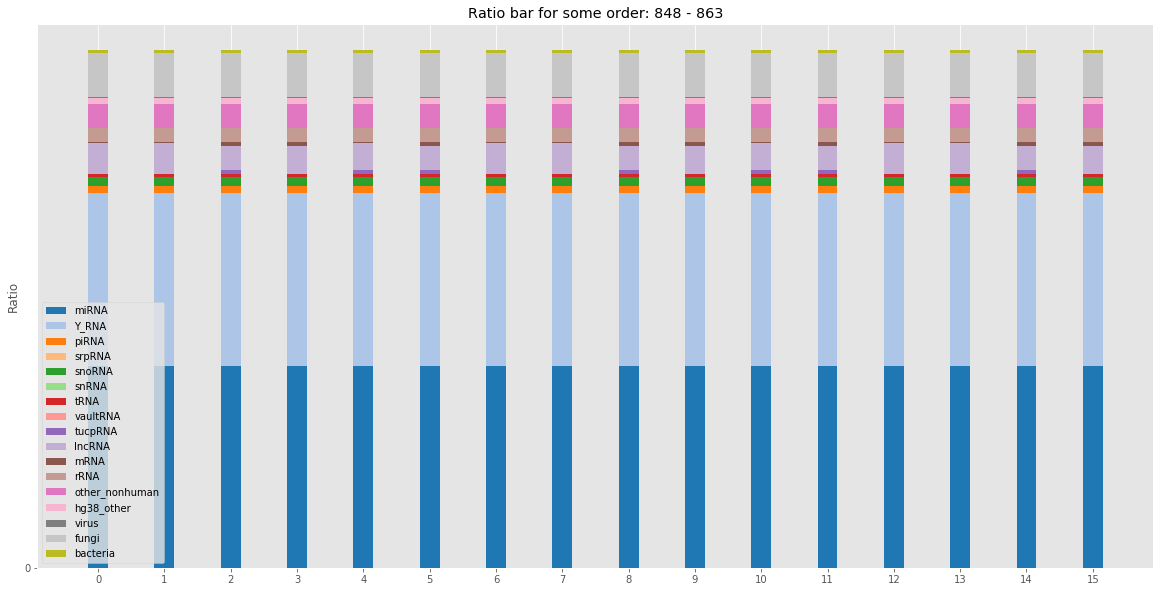

In [60]:
for i in range(54):
    fig,ax=plt.subplots(1,figsize=(20,1*10))
    plot_bar(0.3,np.arange(i*16,(i+1)*16),axes=ax)
    fig.savefig('images/stacked_bar/stacked bar_'+str(i))

In [8]:
for i in range(864):
    print rankind[i][1:4]
    print allratiodata[i,1:4]

[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3.07258005e-01 1.08802024e-02 2.15403953e-04]
[1 2 3]
[3

[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3.06337066e-01 1.18011420e-02 2.15403953e-04]
[2 1 3]
[3

[3.07258005e-01 1.08672583e-02 2.28368362e-04]
[3 1 2]
[3.07258005e-01 1.08672583e-02 2.28368362e-04]
[3 1 2]
[3.07258005e-01 1.08672583e-02 2.28368362e-04]
[3 1 2]
[3.07258005e-01 1.08672583e-02 2.28368362e-04]
[3 1 2]
[3.07258005e-01 1.08672583e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.06337066e-01 1.17881776e-02 2.28368362e-04]
[3 2 1]
[3.0633706

In [9]:
np.unique(allratiodata[:,1:4],axis=0)

array([[3.06337066e-01, 1.17881776e-02, 2.28368362e-04],
       [3.06337066e-01, 1.18011420e-02, 2.15403953e-04],
       [3.07258005e-01, 1.08672583e-02, 2.28368362e-04],
       [3.07258005e-01, 1.08802024e-02, 2.15403953e-04]])

In [10]:
np.unique(allratiodata[:,4:8],axis=0)

array([[0.01632842, 0.00063059, 0.00407233, 0.00010623],
       [0.01632844, 0.00063057, 0.00407233, 0.00010623],
       [0.01632844, 0.00063059, 0.00407231, 0.00010623]])

In [11]:
np.unique(allratiodata[:,8:11],axis=0)

array([[9.94343764e-05, 4.93627871e-02, 8.45806944e-03],
       [9.94343764e-05, 5.56485370e-02, 2.17233984e-03],
       [1.19864986e-04, 5.56485370e-02, 2.15190923e-03],
       [7.53173303e-03, 4.19304885e-02, 8.45806944e-03],
       [7.91145427e-03, 4.19304885e-02, 8.07836849e-03],
       [7.91145427e-03, 4.78569478e-02, 2.15190923e-03]])

In [130]:
import plotly.plotly as py
import plotly.graph_objs as go
def draw(i):
    fig = {
      "data": [
        {
          "values": allratiodata[i],
          "labels": rnanames,
          "domain": {"x": [0, 1.28]},
          "hole": .4,
          "type": "pie"
        }],
      "layout": {
          "autosize":False,
        "width":1000,
        "height":700,
            "title":"Mapping Ratio",
            "annotations": [
                {
                    "font": {
                        "size": 14
                    },
                    "showarrow": False,
                    "text": "mapping ratio",
                    "x": 0.5,
                    "y": 0.5
                }
            ]
        }
    }
    py.iplot(fig, filename='mapping ratio')

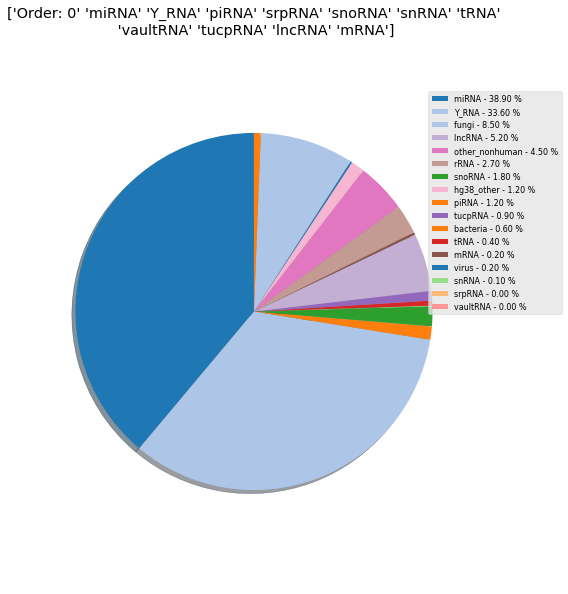

In [62]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

colours = (np.array(tableau20)/float(256))[:14]
explode = np.repeat(0,14)
#rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'other_genome','NonHuman','snRNA','srpRNA','tRNA','lncRNA','mRNA']


fig, ax = plt.subplots(figsize=(8,10))

def update(num):
    ax.clear()
    ax.axis('equal')
    x = rnanames
    y = allratiodata[num]
    z = np.array([float('{:.3f}'.format(y[i])) for i in range(y.shape[0])])*100
    patches, texts = ax.pie(y,  colors=colours, 
                        shadow=True, startangle=90)
    ax.set_title(np.concatenate((np.array(['Order: '+str(num)]),rnanames[:11][rankind[num]])))
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.04, .7),
           fontsize=8)

ani = FuncAnimation(fig, update, frames=range(864), interval=500,repeat=True)
#ani
Writer = animation.writers['ffmpeg']
writer1 = Writer(fps=5)
ani.save('images/pie_animation_slow.mp4', writer=writer1)

In [140]:
rnanames

array(['miRNA', 'Y_RNA', 'piRNA', 'srpRNA', 'snoRNA', 'snRNA', 'tRNA',
       'vaultRNA', 'tucpRNA', 'lncRNA', 'mRNA', 'rRNA', 'nonhuman',
       'other-region', 'virus', 'fungi', 'bacteria'], dtype='|S12')

#### criteria
miRNA $40\% \pm 10\%$ <br>
Y_RNA  $20\% \sim 30\%$ <br>
piRNA  $2\% \pm 3\%$ <br>
lncRNA  $\leq10\%$ <br>

In [12]:
def pick_order(ind):
    forcheckarr = allratiodata[ind]
    ind1 = 0.3<forcheckarr[0] <0.5
    ind2 = 0.2<forcheckarr[1] <0.4
    ind3 = forcheckarr[2] <0.05
    ind4 = forcheckarr[9] <0.1
    if ind1&ind2&ind3&ind4:
        print 'pass: '+str(ind)
        #print forcheckarr[0],forcheckarr[1],forcheckarr[2],forcheckarr[9]
    else:
        print 'do not pass:'
        #print ind1,ind2,ind3,ind4,'\n'
        print forcheckarr[0],forcheckarr[1],forcheckarr[2],forcheckarr[9]

In [13]:
for i in range(864):
    pick_order(i)

pass: 0
pass: 1
pass: 2
pass: 3
pass: 4
pass: 5
pass: 6
pass: 7
pass: 8
pass: 9
pass: 10
pass: 11
pass: 12
pass: 13
pass: 14
pass: 15
pass: 16
pass: 17
pass: 18
pass: 19
pass: 20
pass: 21
pass: 22
pass: 23
pass: 24
pass: 25
pass: 26
pass: 27
pass: 28
pass: 29
pass: 30
pass: 31
pass: 32
pass: 33
pass: 34
pass: 35
pass: 36
pass: 37
pass: 38
pass: 39
pass: 40
pass: 41
pass: 42
pass: 43
pass: 44
pass: 45
pass: 46
pass: 47
pass: 48
pass: 49
pass: 50
pass: 51
pass: 52
pass: 53
pass: 54
pass: 55
pass: 56
pass: 57
pass: 58
pass: 59
pass: 60
pass: 61
pass: 62
pass: 63
pass: 64
pass: 65
pass: 66
pass: 67
pass: 68
pass: 69
pass: 70
pass: 71
pass: 72
pass: 73
pass: 74
pass: 75
pass: 76
pass: 77
pass: 78
pass: 79
pass: 80
pass: 81
pass: 82
pass: 83
pass: 84
pass: 85
pass: 86
pass: 87
pass: 88
pass: 89
pass: 90
pass: 91
pass: 92
pass: 93
pass: 94
pass: 95
pass: 96
pass: 97
pass: 98
pass: 99
pass: 100
pass: 101
pass: 102
pass: 103
pass: 104
pass: 105
pass: 106
pass: 107
pass: 108
pass: 109
pass: 110


[Text(0,0,u'0.0%'),
 Text(0,0,u'10.0%'),
 Text(0,0,u'20.0%'),
 Text(0,0,u'30.0%'),
 Text(0,0,u'40.0%'),
 Text(0,0,u'50.0%'),
 Text(0,0,u'60.0%'),
 Text(0,0,u'70.0%'),
 Text(0,0,u'80.0%'),
 Text(0,0,u'90.0%')]

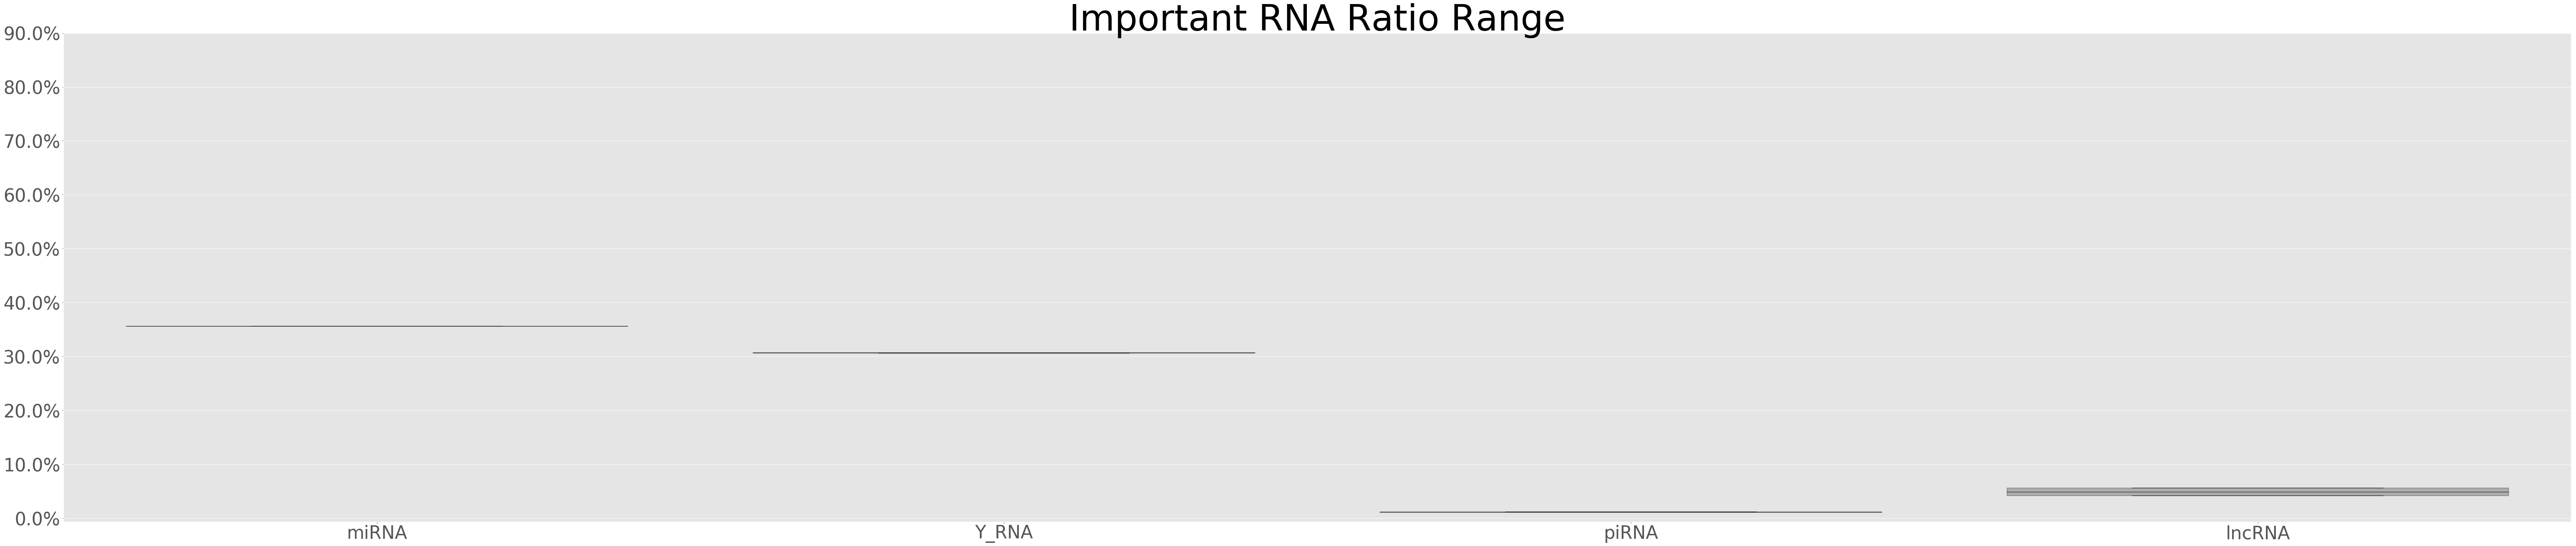

In [14]:
fig, ax = plt.subplots(figsize=(100,20))
sns.boxplot(data =allratiodata[:,np.array([0,1,2,9])],ax=ax,boxprops=dict(alpha=.5))
ax.set_title(u'Important RNA Ratio Range',fontsize=80)
ax.set_xticks(range(4))
ax.set_xticklabels(['miRNA', 'Y_RNA', 'piRNA','lncRNA'],fontsize=40)
ax.set_yticks(np.arange(0,1,0.1))
ax.set_yticklabels(['{:.1f}%'.format(i*10) for i in range(10)],fontsize=40)

[Text(0,0,u'0.0%'),
 Text(0,0,u'10.0%'),
 Text(0,0,u'20.0%'),
 Text(0,0,u'30.0%'),
 Text(0,0,u'40.0%'),
 Text(0,0,u'50.0%'),
 Text(0,0,u'60.0%'),
 Text(0,0,u'70.0%'),
 Text(0,0,u'80.0%'),
 Text(0,0,u'90.0%')]

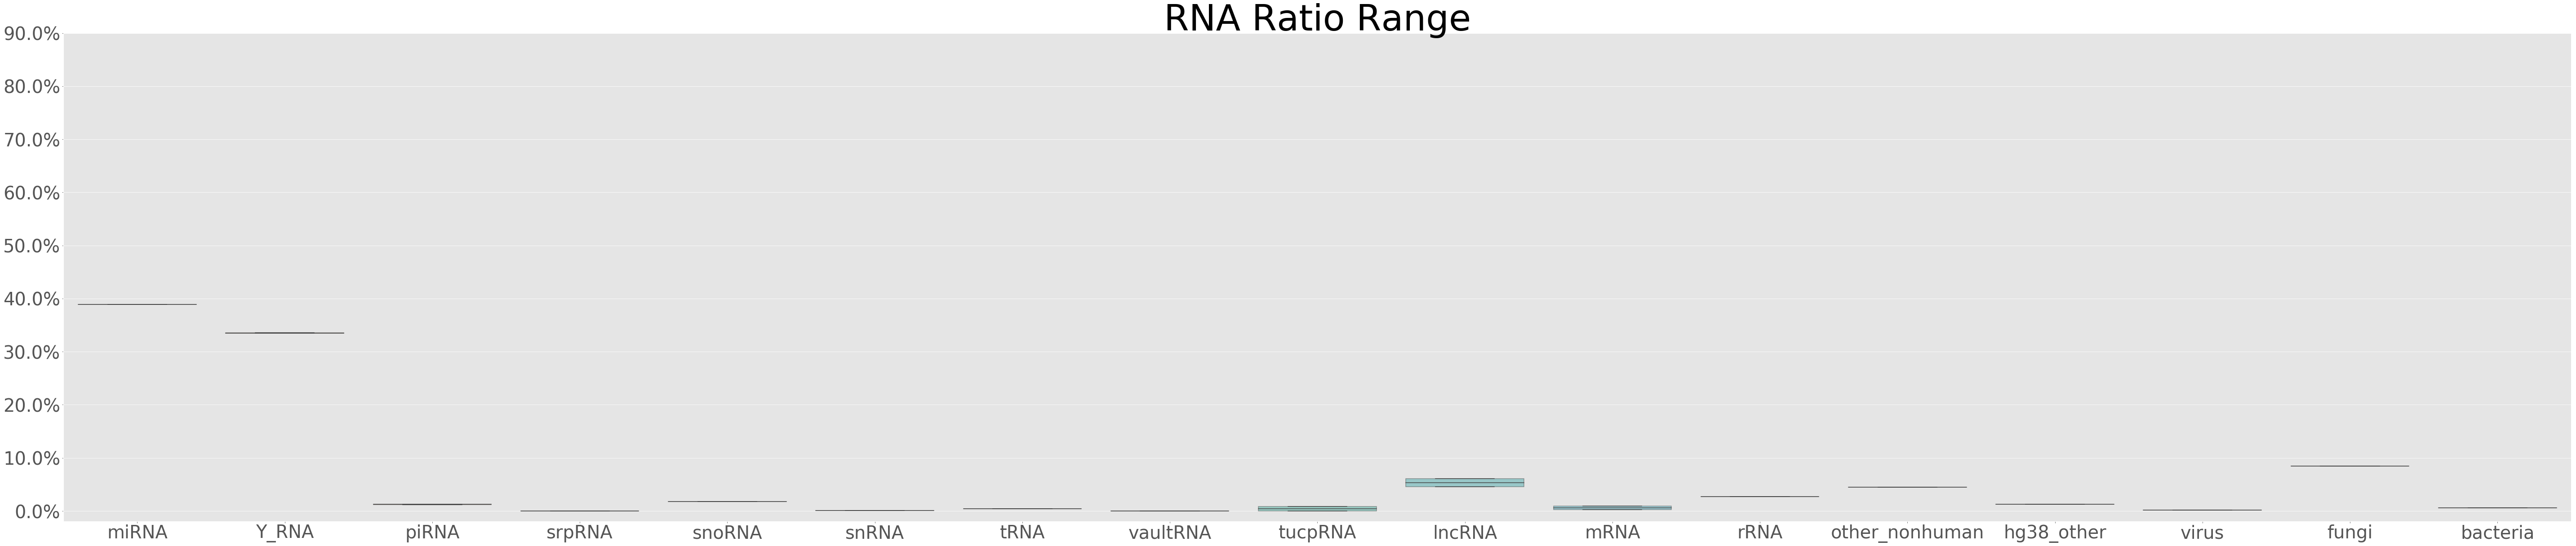

In [57]:
fig, ax = plt.subplots(figsize=(100,20))
sns.boxplot(data =allratiodata[:],ax=ax,boxprops=dict(alpha=.5))
ax.set_title(u'RNA Ratio Range',fontsize=80)
ax.set_xticks(range(17))
ax.set_xticklabels(rnanames,fontsize=40)
ax.set_yticks(np.arange(0,1,0.1))
ax.set_yticklabels(['{:.1f}%'.format(i*10) for i in range(10)],fontsize=40)

In [7]:
np.array([[1.69530011e+07, 1.50462019e+07, 5.33691780e+05, 1.05310000e+04,
        7.95755169e+05, 2.85018305e+04, 2.00353627e+05, 5.21037288e+03,
        3.79830593e+05, 2.23343749e+06, 1.03443763e+05]])/np.sum(np.array([[1.69530011e+07, 1.50462019e+07, 5.33691780e+05, 1.05310000e+04,
        7.95755169e+05, 2.85018305e+04, 2.00353627e+05, 5.21037288e+03,
        3.79830593e+05, 2.23343749e+06, 1.03443763e+05]]))

array([[4.67154049e-01, 4.14610610e-01, 1.47063210e-02, 2.90190466e-04,
        2.19276957e-02, 7.85391650e-04, 5.52091087e-03, 1.43576159e-04,
        1.04665480e-02, 6.15442281e-02, 2.85047895e-03]])

In [9]:
pearsonr(np.array([4.67154049e-01, 4.14610610e-01, 1.47063210e-02, 2.90190466e-04,
        2.19276957e-02, 7.85391650e-04, 5.52091087e-03, 1.43576159e-04,
        1.04665480e-02, 6.15442281e-02, 2.85047895e-03]),np.array([4.72496897e-01, 4.07838112e-01, 1.44418083e-02, 2.85915876e-04,
       2.16735114e-02, 8.37011524e-04, 5.40536392e-03, 1.41005513e-04,
       1.05012482e-02, 6.35227950e-02, 2.85633111e-03]))

(0.9998709340678326, 1.8449583272363717e-17)

In [6]:
np.array([3.55970787e-01, 3.07258005e-01, 1.08802024e-02, 2.15403953e-04,
       1.63284393e-02, 6.30589646e-04, 4.07230537e-03, 1.06231054e-04,
       7.91145427e-03, 4.78569478e-02, 2.15190923e-03])/np.sum(np.array([3.55970787e-01, 3.07258005e-01, 1.08802024e-02, 2.15403953e-04,
       1.63284393e-02, 6.30589646e-04, 4.07230537e-03, 1.06231054e-04,
       7.91145427e-03, 4.78569478e-02, 2.15190923e-03]))

array([4.72496897e-01, 4.07838112e-01, 1.44418083e-02, 2.85915876e-04,
       2.16735114e-02, 8.37011524e-04, 5.40536392e-03, 1.41005513e-04,
       1.05012482e-02, 6.35227950e-02, 2.85633111e-03])

### 寻找差异大的mapping ratio

In [46]:
allratiodata[0]

array([3.55970787e-01, 3.07258005e-01, 1.08802024e-02, 2.15403953e-04,
       1.63284393e-02, 6.30589646e-04, 4.07230537e-03, 1.06231054e-04,
       7.91145427e-03, 4.78569478e-02, 2.15190923e-03, 2.43386584e-02,
       1.26150817e-01, 1.13273020e-02, 1.51772850e-03, 7.76705023e-02,
       5.61271651e-03])

In [15]:
from scipy.stats import pearsonr

In [16]:
pcc = np.zeros([863,])
for i in range(863):
    pcc[i] = pearsonr(allratiodata[0][1:11],allratiodata[i+1][1:11])[0]

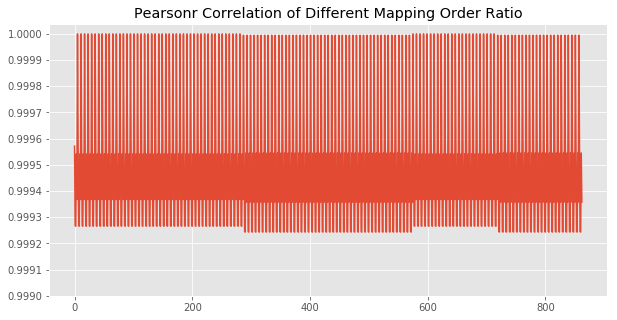

In [28]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.plot(pcc)
ax.set_title('Pearsonr Correlation of Different Mapping Order Ratio')
ax.set_yticks(np.arange(0.999,1.,0.0001))

#### 主要的pattern

In [102]:
print 'pattern 1: '+str(rnanames[rankind[0]])
print 'pattern 2: '+str(rnanames[rankind[300]])
print 'pattern 3: '+str(rnanames[rankind[600]])
for i in np.arange(420,700):
    print str(i)  
    print rankind[i]
    print allratiodata[i]

pattern 1: ['miRNA' 'Y_RNA' 'piRNA' 'srpRNA' 'snoRNA' 'snRNA' 'tRNA' 'vaultRNA'
 'tucpRNA' 'lncRNA' 'mRNA']
pattern 2: ['miRNA' 'srpRNA' 'Y_RNA' 'piRNA' 'snoRNA' 'vaultRNA' 'snRNA' 'tRNA'
 'tucpRNA' 'lncRNA' 'mRNA']


In [29]:
rnanames

array(['miRNA', 'Y_RNA', 'piRNA', 'srpRNA', 'snoRNA', 'snRNA', 'tRNA',
       'vaultRNA', 'tucpRNA', 'lncRNA', 'mRNA', 'rRNA', 'nonhuman',
       'other-region', 'virus', 'fungi', 'bacteria'], dtype='|S12')

In [91]:
np.concatenate((rnanames[rankind[600]],rnanames[11:]))

array(['miRNA', 'srpRNA', 'Y_RNA', 'piRNA', 'snoRNA', 'vaultRNA', 'snRNA',
       'tRNA', 'tucpRNA', 'lncRNA', 'mRNA', 'rRNA', 'nonhuman',
       'other-region', 'virus', 'fungi', 'bacteria'], dtype='|S12')

In [172]:
allratiodata[600]

array([3.55970787e-01, 2.28368362e-04, 3.07258005e-01, 1.08672583e-02,
       1.63284393e-02, 1.06231054e-04, 6.30589646e-04, 4.07230537e-03,
       7.91145427e-03, 4.78569478e-02, 2.15190923e-03, 2.43386584e-02,
       1.26150817e-01, 1.13273020e-02, 1.51772850e-03, 7.76705023e-02,
       5.61271651e-03])

In [177]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [
    {
      "values": allratiodata[0],
      "labels":rnanames,
      "domain": {"x": [0, .3],"y":[0.2]},
      "name": "pattern1",
     # "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    },  
      {
      "values": allratiodata[300],
      "labels":rnanames,
      "domain": {"x": [.3, 0.6],"y":[0.2]},
      "name": "pattern2",
      #"hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": allratiodata[800],
      "labels":rnanames,
      "domain": {"x": [.6, 0.9],"y":[0.2]},
      "name": "pattern3",
      #"hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Mapping ratio in different order",
        "annotations": [
            {
                "font": {
                    "size": 14
                },
                "showarrow": False,
                "text": "pattern1",
                "x": 0.1,
                "y": 0.6
            },
            {
                "font": {
                    "size": 14
                },
                "showarrow": False,
                "text": "pattern2",
                "x": 0.450,
                "y": 0.6
            },
            {
                "font": {
                    "size": 14
                },
                "showarrow": False,
                "text": "pattern3",
                "x": 0.81,
                "y": 0.6
            }
        ]
    }
}
py.iplot(fig, filename='donut')

In [58]:
def draw_pie_fig(pattern,data):
    fig = {
      "data": [
        {
          "values": data,
          "labels":rnanames,
          "domain": {"x": [0.],"y":[0.2]},
          "name": pattern,
         # "hoverinfo":"label+percent",
          "hole": .4,
          "type": "pie"
        }],
      "layout": {
            "title":"Mapping ratio in different order",
            "annotations": [
                {
                    "font": {
                        "size": 14
                    },
                    "showarrow": False,
                    "text": pattern,
                    "x": 0.5,
                    "y": 0.6
                }
            ]
        }
    }
    return fig

In [59]:
py.iplot(draw_pie_fig('pattern1',allratiodata[0]), filename='donut')

py.iplot(draw_pie_fig('pattern2',allratiodata[300]), filename='donut')

py.iplot(draw_pie_fig('pattern3',allratiodata[800]), filename='donut')

### read length

In [165]:
average_length_allrank.shape

(864, 11, 35)

plt.plot(average_length_allrank[0,3])
plt.plot(ratiodata[0,3])
numss =216
fig,ax = plt.subplots(numss,4,figsize = (16,numss*4))
for i in range(numss):
    for j in range(4):
        ax[i,j].plot(ratiodata[i*4+j].T)

In [238]:
#调整获得length的方案  5.19 21：00
np.where(np.in1d(testind,lengthind))
lengthind = np.arange(16,51)
testind = np.arange(10,60)
testtind = np.arange(20,40)
mimic = np.arange(0,100)
np.where(testind ==(0+16))
returnlength = np.zeros([35])
for i in range(35):
    returnlength[i] = mimic[np.where(testind ==(i+16))] if np.where(testind ==(i+16))[0].shape[0]!=0 else 0
returnlength

(array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        40]),)

In [6]:
with h5py.File('wholelength2') as f:
    average_length_allrank=  f['data'][:]
ratiodata = np.zeros([864, 11, 35])
for i in range(864):
    for j in range(11):
        ratiodata[i,j] = average_length_allrank[i,j]/np.sum(average_length_allrank[i,j])

In [6]:
def get_ratio(arr):
    tmp=arr
    average = np.ndarray([tmp.shape[0],tmp.shape[1]])
    for i in range(tmp.shape[0]):
        average[i] = tmp[i] / float(np.sum(tmp[i]))
    return average

In [7]:
average_length_allrank[0].shape

(11, 35)

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def plot_3d(t,rnanames,count_,num,lengthdat,azim=50,elev=20):
    '''
    count_ 长度种类  num rna数量
    '''
    fig = plt.figure(figsize=(20,16))
    ax1 = fig.gca(projection="3d")

    xpos = np.repeat(np.arange(1,count_+1),num).reshape(count_,-1).T.ravel()
    ypos = np.repeat(range(num),count_).ravel()
    num_elements = len(xpos)
    zpos = np.zeros(count_*num)
    dx = np.ones(count_*num)/5
    dy = np.ones(count_*num)/5
    dz = lengthdat.ravel()

    for i in range(num):
        ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
                  dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=(np.array(tableau20)/float(256))[:num][i],alpha=0.9)
    plt.xticks(range(count_), [str(i+15) for i in range(count_)], color='red')
    #for i in range(9):
    ax1.set_yticks(range(num))
    ax1.set_yticklabels(rnanames, color='blue')
    for color,tick in zip((np.array(tableau20)/float(256))[:num],ax1.yaxis.get_major_ticks()):
        tick.label1.set_color(color)
    ax1.view_init(azim=azim,elev=elev)  # 50 20
    ax1.set_title('Reads Length Distribution',fontsize=30)
    #ax1.bar3d(xpos[3:], ypos[3:], zpos[3:], dx[3:], dy[3:], dz[3:], color='b')
    #print ('azim: '+str(azim))
    #plt.show()
    fig.savefig('images/length/lengthdistribution_'+str(t))

In [69]:
rnanames

array(['miRNA', 'Y_RNA', 'piRNA', 'srpRNA', 'snoRNA', 'snRNA', 'tRNA',
       'vaultRNA', 'tucpRNA', 'lncRNA', 'mRNA', 'rRNA', 'other_nonhuman',
       'hg38_other', 'virus', 'fungi', 'bacteria'], dtype='|S14')

In [ ]:
for t in np.arange(0,864):
    plot_3d(t,np.flipud(rnanames[:11]),35,11,np.flipud(ratiodata[t]),azim=50,elev=20)

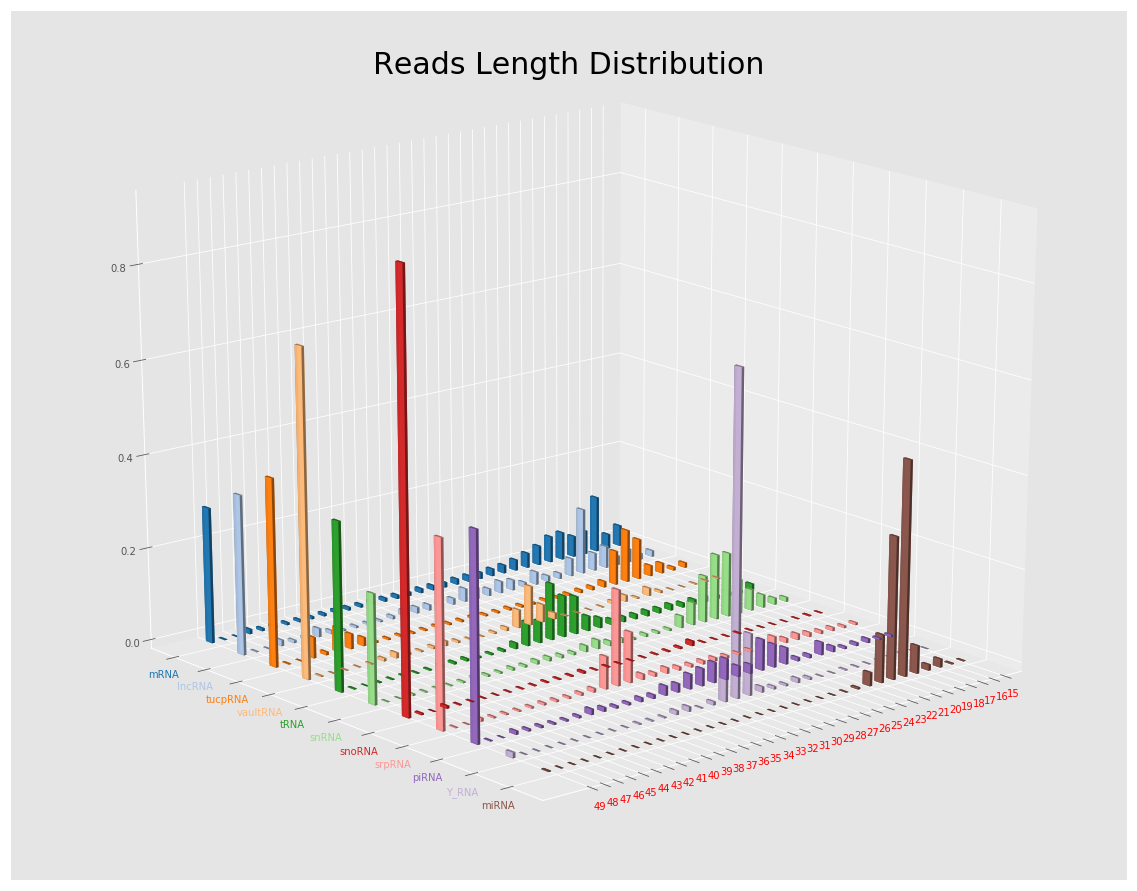

In [75]:
plot_3d(0,np.flipud(rnanames[:11]),35,11,np.flipud(ratiodata[0]),azim=50,elev=20)

In [39]:
lenpcc = np.zeros([863,])
for i in range(863):
    lenpcc[i] = pearsonr(ratiodata[i].ravel(),ratiodata[0].ravel())[0]

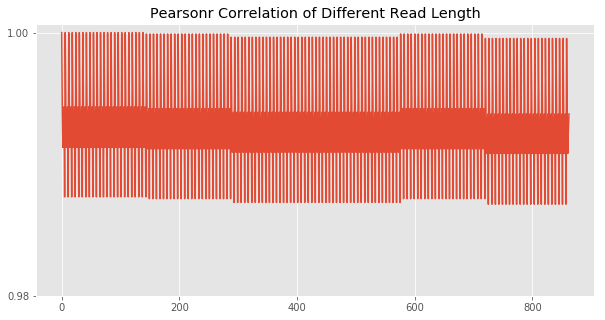

In [44]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.plot(lenpcc)
ax.set_title('Pearsonr Correlation of Different Read Length')
ax.set_yticks(np.arange(0.98,1.,0.02))

In [46]:
bin(300)

'0b100101100'

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(16,12))

def update(nums):
    ax1 = fig.gca(projection="3d")
    count_ = 35
    num = 11
    azim=50
    elev=20
    xpos = np.repeat(np.arange(1,count_+1),num).reshape(count_,-1).T.ravel()
    ypos = np.repeat(range(num),count_).ravel()
    num_elements = len(xpos)
    zpos = np.zeros(count_*num)
    dx = np.ones(count_*num)/5
    dy = np.ones(count_*num)/5
    dz = ratiodata[nums].ravel()

    for i in range(num):
        ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
                  dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=(np.array(tableau20)/float(256))[:num][i],alpha=0.9)
    plt.xticks(range(count_), [str(i+15) for i in range(count_)], color='red')
    #for i in range(9):
    ax1.set_yticks(range(num))
    ax1.set_yticklabels(rnanames[1:], color='blue')
    for color,tick in zip((np.array(tableau20)/float(256))[:num],ax1.yaxis.get_major_ticks()):
        tick.label1.set_color(color)
    ax1.view_init(azim=azim,elev=elev)  # 50 20
    ax1.set_title('Reads Length Distribution Order '+str(nums),fontsize=30,y = 0.98)
    print nums
ani = FuncAnimation(fig, update, frames=range(864), interval=500,repeat=True)
#ani
Writer = animation.writers['ffmpeg']
writer1 = Writer(fps=24)
ani.save('images/length/animation_fast.mp4', writer=writer1)

In [268]:
def get_length_info_pie(lengthrange,lengthdat):
    lenrange = lengthrange-15
    count = np.sum(lengthdat[:,lenrange],axis=1)
    return np.around(count/np.sum(np.sum(lengthdat[:,lenrange],axis=1)),decimals=2)

In [269]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = rnanames
values = get_length_info_pie(np.arange(28,32),average_length_allrank[0])
colors = tableau20[:11]

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=13),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

In [270]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [
    {
      "values": get_length_info_pie(np.arange(29,31),average_length_allrank[0]),
      "labels": rnanames,
      "domain": {"x": [0, .48]},
      "name": "29-31",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": get_length_info_pie(np.arange(28,32),average_length_allrank[0]),
      "labels": rnanames,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "28-32",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Reads Length in Specific Range",
        "annotations": [
            {
                "font": {
                    "size": 14
                },
                "showarrow": False,
                "text": "Length: 29-31",
                "x": 0.180,
                "y": 0.5
            },
            {
                "font": {
                    "size": 14
                },
                "showarrow": False,
                "text": "Length: 28-32",
                "x": 0.82,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

In [36]:
table1.head()

,len,hg38,miRNA,piRNA,Y_RNA,snRNA,srpRNA,tRNA,lncRNA,mRNA,snoRNA
0,16,90572.2,22104.7,2674.16,4196.22,356.438,199.891,2645.38,3144.59,6114.84,778.859
1,17,99778.6,30971.8,2582.08,9170.50,522.281,148.375,1057.39,5526.11,4336.61,1428.840
2,18,514321.0,237480.0,2699.06,39952.70,660.812,173.188,1528.80,69517.20,15162.30,662.094
3,19,337938.0,200267.0,3581.84,10652.00,1591.880,151.141,1573.05,17124.50,8169.92,420.062
4,20,1232370.0,881541.0,2655.55,4540.72,3602.640,191.906,2352.66,126314.00,21881.70,507.781


##### other plot

In [5]:
table1 = pd.read_table('all_type.len')

In [6]:
def get_length_info_pie_(lengthrange,lengthdat):
    lenrange = lengthrange-15
    count = np.sum(lengthdat[:,lenrange],axis=1)
    return np.around(count/np.sum(np.sum(lengthdat[:,lenrange],axis=1)),decimals=4)

In [7]:
get_length_info_pie_(np.arange(20,31),np.array(table1.iloc[:,2:]).T)

array([6.495e-01, 2.220e-02, 1.322e-01, 1.200e-03, 1.000e-04, 1.400e-03,
       1.812e-01, 1.110e-02, 1.200e-03])

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [
    {
      "values": get_length_info_pie_(np.arange(20,26),np.array(table1.iloc[:,2:]).T),
      "labels": [u'hg38', u'miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA', u'snoRNA'][1:],
      "domain": {"x": [0, .48]},
      "name": "20-25",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": get_length_info_pie_(np.arange(21,28),np.array(table1.iloc[:,2:]).T),
      "labels": [u'hg38', u'miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA', u'snoRNA'][1:],
      "domain": {"x": [.52, 1]},
      "name": "21-27",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Reads Length in Specific Range",
        "annotations": [
            {
                "font": {
                    "size": 14
                },
                "showarrow": False,
                "text": "Length: 20-25",
                "x": 0.180,
                "y": 0.5
            },
            {
                "font": {
                    "size": 14
                },
                "showarrow": False,
                "text": "Length: 21-27",
                "x": 0.82,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

In [10]:
get_length_info_pie_(np.arange(20,26),np.array(table1.iloc[:,2:]).T)

array([7.591e-01, 7.000e-03, 7.800e-03, 1.300e-03, 1.000e-04, 7.000e-04,
       2.113e-01, 1.230e-02, 4.000e-04])

In [57]:
table2 = pd.read_table('reads_summary')

In [11]:
for i in np.arange(20,35):
    for j in range(15):
        get_length_info_pie_(np.arange(i,i+j),np.array(table1.iloc[:,2:]).T)

In [59]:
table2.head()

,sample ibSizeN,tooShortN,cleanN,rRNA_N,keptN,hg38,miRNA,piRNA,Y_RNA,snRNA,snoRNA,srpRNA,tRNA,lncRNA,mRNA,hg38other,nonHuman_N
10515058-A,46335863,1966303,44369560,2652129,41717431,39193976,11797965,1048993,17440609,106140,1878961,10308,60203,2669322,281518,3901611,2521801
12402567-A,71090111,9751068,61339043,1189562,60149481,50443256,28308197,1030118,9398801,18388,455397,7057,99703,6858416,458498,3810642,9704264
13515292-A,48256702,3534313,44722389,363451,44358938,37746626,14541929,252845,12207298,54063,29687,8008,35441,5718846,268736,4631857,6610228
17402567-B,59259582,12353348,46906234,965861,45940373,35146222,17661548,520200,8139539,27899,123316,10318,80261,4990402,343242,3251411,10792237
249136-B,75361217,18099287,57261930,4248383,53013547,36598642,12984184,2056803,7221441,102398,5495639,7525,64272,5218574,294528,3154758,16413425


In [13]:
nonhuman = np.array([np.average(table2,axis=0)[2] - np.average(table2,axis=0)[3]])
otherregion = np.array([np.average(table2,axis=0)[3] - np.sum(np.average(table2,axis=0)[4:])])
rRNA = np.array([np.average(table2,axis=0)[1] - np.average(table2,axis=0)[2]])

for i in range(61):
    print  table2.iloc[i,3]

for i in range(61):
    print  (table2.iloc[i,3].sum() - sum(table2.iloc[i,4:].sum()))/float(table2.iloc[i,3])

In [16]:
table2.columns[4:]

Index([u'miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'snoRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA'],
      dtype='object')

In [65]:
np.average(table2,axis=0)[3]

1199623.7213114754

In [66]:
ratiowhole = np.concatenate((np.average(table2,axis=0)[6:],np.array([np.average(table2,axis=0)[3]])))/(np.average(table2,axis=0)[5])

In [26]:
ratiowhole = np.concatenate((np.average(table2,axis=0)[4:],rRNA,nonhuman,otherregion))/np.average(table2,axis=0)[1]

In [63]:
ratiowhole.shape

(11,)

In [67]:
allrnanames = np.array([u'miRNA', u'piRNA', u'Y_RNA', u'snRNA',u'snoRNA',u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA','other region','non-human','rRNA'])

In [62]:
ratiowhole

array([3.60485207e-01, 2.61326602e-02, 3.97552179e-01, 1.16092172e-03,
       2.28573592e-02, 1.83253778e-04, 1.40621390e-03, 1.00933646e-01,
       8.96966993e-03, 8.03807885e-02, 1.64903686e-01])

In [69]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [    
    {
      "values": ratiowhole,
      "labels": allrnanames,
      "domain": {"x": [.1, 1]},    
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Reads Distribution"
    }
}
py.iplot(fig, filename='donut')

In [338]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [    
    {
      "values": get_length_info_pie_(np.arange(21,28),np.array(table1.iloc[:,2:]).T),
      "labels": [u'hg38', u'miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA', u'snoRNA'][1:],
      "domain": {"x": [.0, 1]},
      "name": "21-27",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Reads Length in Specific Range",
        "annotations": [
            {
                "font": {
                    "size": 14
                },
                "showarrow": False,
                "text": "Length: 21-27",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

In [372]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [    
    {
      "values": get_length_info_pie_(np.arange(15,50),np.array(table1.iloc[:,2:]).T),
      "labels": [u'hg38', u'miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA', u'snoRNA'][1:],
      "domain": {"x": [.0, 1]},
      "name": "21-27",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Reads Length in Specific Range",
    }
}
py.iplot(fig, filename='donut')

In [1]:
get_length_info_pie_(np.arange(15,50),np.array(table1.iloc[:,2:]).T)

NameError: name 'get_length_info_pie_' is not defined

In [78]:
ttarr = np.array([[0,  0, 0, 0,0 , 0,0 , 0],[21.0,     0,0 , 0,0 , 0,0 , 0],[71.2,  54.1, 0,0 ,0 ,0 , 0,0],
[36.4,  36.4, 36.4, 0, 0,0 ,0 , 0],[52.1,  54.1, 52.1, 0.7,  0,0 , 0, 0],[89.9,  75.2, 36.4, 54.1, 53.0, 0, 0, 0],
[53.0,  73.0, 75.2, 52.1, 36.4,  88. ,  3,   0],[90.1,  93.2, 71.2, 63.4, 52.1,  36.4, 73.0,0]])

In [87]:
[np.concatenate((ttarr[i][:i],ttarr.T[i][i-8:])) for i in range(8)]

[array([ 0. , 21. , 71.2, 36.4, 52.1, 89.9, 53. , 90.1]),
 array([21. ,  0. , 54.1, 36.4, 54.1, 75.2, 73. , 93.2]),
 array([71.2, 54.1,  0. , 36.4, 52.1, 36.4, 75.2, 71.2]),
 array([36.4, 36.4, 36.4,  0. ,  0.7, 54.1, 52.1, 63.4]),
 array([52.1, 54.1, 52.1,  0.7,  0. , 53. , 36.4, 52.1]),
 array([89.9, 75.2, 36.4, 54.1, 53. ,  0. , 88. , 36.4]),
 array([53. , 73. , 75.2, 52.1, 36.4, 88. ,  3. , 73. ]),
 array([90.1, 93.2, 71.2, 63.4, 52.1, 36.4, 73. ,  0. ])]

In [117]:
def get_ratio(arr):
    tmp=arr
    average = np.ndarray([tmp.shape[0],tmp.shape[1]])
    for i in range(tmp.shape[0]):
        average[i] = tmp[i] / float(np.sum(tmp[i]))
    return average

In [131]:
rankin1 = np.array(list(itertools.permutations(np.arange(3,6))))
rankin2 = np.array(list(itertools.permutations(np.arange(6,10))))
rankin3 = np.array(list(itertools.permutations(np.arange(10,13))))
rankind = np.zeros([864,12]).astype('int')
for i in range(6):
    for j in range(24):
        for t in range(6):
            rankind[i*144+j*6+t] =\
            np.concatenate((np.array([1,2]),rankin1[i],rankin2[j],rankin3[t]))

In [132]:
rankind

array([[ 1,  2,  3, ..., 10, 11, 12],
       [ 1,  2,  3, ..., 10, 12, 11],
       [ 1,  2,  3, ..., 11, 10, 12],
       ...,
       [ 1,  2,  5, ..., 11, 12, 10],
       [ 1,  2,  5, ..., 12, 10, 11],
       [ 1,  2,  5, ..., 12, 11, 10]])

In [136]:
originalnames = np.array(['length','lncRNA', 'miRNA', 'mRNA', 'piRNA', 'snoRNA', 'snRNA', 'srpRNA',
       'tRNA', 'vaultRNA', 'Y_RNA', 'tucpRNA'])
rnanames = np.array(['length', 'miRNA', 
            'Y_RNA', 'piRNA', 'srpRNA', 
            'snoRNA', 'snRNA', 'tRNA','vaultRNA',
            'tucpRNA', 'lncRNA','mRNA' ])
xsorted = np.argsort(originalnames)
ypos = np.searchsorted(originalnames[xsorted], rnanames)
transind  = xsorted[ypos]

In [155]:
originalnames[transind]

array(['length', 'miRNA', 'Y_RNA', 'piRNA', 'srpRNA', 'snoRNA', 'snRNA',
       'tRNA', 'vaultRNA', 'tucpRNA', 'lncRNA', 'mRNA'], dtype='|S8')

In [156]:
transind

array([ 0,  2, 10,  4,  7,  5,  6,  8,  9, 11,  1,  3])

In [139]:
originalnames[transind][rankind[0]-1]

array(['length', 'miRNA', 'Y_RNA', 'piRNA', 'srpRNA', 'snoRNA', 'snRNA',
       'tRNA', 'vaultRNA', 'tucpRNA', 'lncRNA', 'mRNA'], dtype='|S8')

In [147]:
for i in range(864):
    print transind[rankind[i]-1]

[ 0  2 10  4  7  5  6  8  9 11  1  3]
[ 0  2 10  4  7  5  6  8  9 11  3  1]
[ 0  2 10  4  7  5  6  8  9  1 11  3]
[ 0  2 10  4  7  5  6  8  9  1  3 11]
[ 0  2 10  4  7  5  6  8  9  3 11  1]
[ 0  2 10  4  7  5  6  8  9  3  1 11]
[ 0  2 10  4  7  5  6  9  8 11  1  3]
[ 0  2 10  4  7  5  6  9  8 11  3  1]
[ 0  2 10  4  7  5  6  9  8  1 11  3]
[ 0  2 10  4  7  5  6  9  8  1  3 11]
[ 0  2 10  4  7  5  6  9  8  3 11  1]
[ 0  2 10  4  7  5  6  9  8  3  1 11]
[ 0  2 10  4  7  5  8  6  9 11  1  3]
[ 0  2 10  4  7  5  8  6  9 11  3  1]
[ 0  2 10  4  7  5  8  6  9  1 11  3]
[ 0  2 10  4  7  5  8  6  9  1  3 11]
[ 0  2 10  4  7  5  8  6  9  3 11  1]
[ 0  2 10  4  7  5  8  6  9  3  1 11]
[ 0  2 10  4  7  5  8  9  6 11  1  3]
[ 0  2 10  4  7  5  8  9  6 11  3  1]
[ 0  2 10  4  7  5  8  9  6  1 11  3]
[ 0  2 10  4  7  5  8  9  6  1  3 11]
[ 0  2 10  4  7  5  8  9  6  3 11  1]
[ 0  2 10  4  7  5  8  9  6  3  1 11]
[ 0  2 10  4  7  5  9  6  8 11  1  3]
[ 0  2 10  4  7  5  9  6  8 11  3  1]
[ 0  2 10  4

[ 0  2  7 10  4  8  5  6  9  3  1 11]
[ 0  2  7 10  4  8  5  9  6 11  1  3]
[ 0  2  7 10  4  8  5  9  6 11  3  1]
[ 0  2  7 10  4  8  5  9  6  1 11  3]
[ 0  2  7 10  4  8  5  9  6  1  3 11]
[ 0  2  7 10  4  8  5  9  6  3 11  1]
[ 0  2  7 10  4  8  5  9  6  3  1 11]
[ 0  2  7 10  4  8  6  5  9 11  1  3]
[ 0  2  7 10  4  8  6  5  9 11  3  1]
[ 0  2  7 10  4  8  6  5  9  1 11  3]
[ 0  2  7 10  4  8  6  5  9  1  3 11]
[ 0  2  7 10  4  8  6  5  9  3 11  1]
[ 0  2  7 10  4  8  6  5  9  3  1 11]
[ 0  2  7 10  4  8  6  9  5 11  1  3]
[ 0  2  7 10  4  8  6  9  5 11  3  1]
[ 0  2  7 10  4  8  6  9  5  1 11  3]
[ 0  2  7 10  4  8  6  9  5  1  3 11]
[ 0  2  7 10  4  8  6  9  5  3 11  1]
[ 0  2  7 10  4  8  6  9  5  3  1 11]
[ 0  2  7 10  4  8  9  5  6 11  1  3]
[ 0  2  7 10  4  8  9  5  6 11  3  1]
[ 0  2  7 10  4  8  9  5  6  1 11  3]
[ 0  2  7 10  4  8  9  5  6  1  3 11]
[ 0  2  7 10  4  8  9  5  6  3 11  1]
[ 0  2  7 10  4  8  9  5  6  3  1 11]
[ 0  2  7 10  4  8  9  6  5 11  1  3]
[ 0  2  7 10

In [151]:
savearr = np.ndarray([864,12]).astype('int')
for i in range(864):
    savearr[i] =  transind[rankind[i]-1]

In [161]:
np.savetxt('rankind',savearr +1,fmt='%d',delimiter=',')

#### 5.25 table

In [81]:
pwd

u'/Users/james/jupyter_notebooks/team2_mapping'

In [84]:

nameforlength = ['miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'snoRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA']

Index([u'miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'snoRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA'],
      dtype='object')

In [86]:
pd.read_table('table/per/4_len_summary.per').head()

,len,miRNA,piRNA,Y_RNA,snRNA,snoRNA,srpRNA,tRNA,lncRNA,mRNA
0,16,0.070658,1.540888,0.063933,1.365320,2.971636,4.478647,5.571676,3.695235,8.107609
1,17,0.100019,1.927832,0.080970,1.552815,6.777645,2.897948,3.744005,2.534494,6.565061
2,18,0.628072,2.281596,0.271323,2.473570,2.467265,3.771492,5.448757,4.352928,10.320454
3,19,0.782788,1.590149,0.172363,5.158128,1.964523,5.990017,5.249264,3.636867,7.756351
4,20,4.127704,1.983730,0.036394,13.573236,1.744522,6.738769,7.312699,9.331055,7.237323


In [ ]:
plot_3d(t,nameforlength,count_,num,lengthdat,azim=50,elev=20)

In [ ]:
"Reads Length in Specific Range"
"Reads Length Distribution"

In [ ]:
def draw_pie_fig(rnanames,centertext,data,title = ):
    fig = {
      "data": [
        {
          "values": data,
          "labels":rnanames,
          "domain": {"x": [0.],"y":[0.2]},
          "name": centertext,
         # "hoverinfo":"label+percent",
          "hole": .4,
          "type": "pie"
        }],
      "layout": {
            "title":title,
            "annotations": [
                {
                    "font": {
                        "size": 14
                    },
                    "showarrow": False,
                    "text": centertext,
                    "x": 0.5,
                    "y": 0.6
                }
            ]
        }
    }
    return fig

In [ ]:
get_length_info_pie_(lengthrange,lengthdat)